# PROJECT 2 - AMES HOUSING DATA AND KAGGLE CHALLENGE

## Problem Statement

The Ames Housing Dataset is an exceptionally detail and robust dataset with over 80 columns of different features relating to houses. In this challenge, we are expected to use the data to create a regression model that predicts the price of houses in Ames, IA. We are free to use any and/or all features that are present in this dataset.

Various stakeholders (Buyers, Sellers, Realtors, Tax agencies) normally measure or predict housing prices in terms of their intuition or the factors of price known to them like location and size. However, **there are as many as hundreds of factors affecting housing prices, which makes it very difficult to assess and quantify the relationship between factors and prices.**

Thru the power of data analytics and machine learning. This project involved training several machine learning models (Linear, Ridge, Lasso and ElasticNet regression) that use the house features and attributes to predict the sale price of houses in Ames, Iowa. **We will examined the features to determine which features are important and which are not, developed multiple machine learning models to find the best model to predict sale prices.**

**The overall success of the prediction model will be based up its Root Mean Squared Error (RMSE).**

# Understanding Data Dictionary

The data was compiled by Dean De Cock and published in Kaggle. Evaluating the data dictionary is an important first step in any data science project. From the dictionary we noted that Tab character was used to separate variables in the data file and there were 82 columns which included 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers).

- Categorical = 23 nominal + 23 ordinal + 1 additional observation identifier = 47
- Numerical = 14 discrete + 20 continuous + 1 additional observation identifier = 35
- We will follow the categorical and numerical features based on the data dictionary to ensure consistency.

We also found that:
1. Data dictionary specifically mentioned 5 unusual records (true outliers) whereby they were very large houses priced relatively appropriately. It was recommended by Prof Dean to remove any houses with GrLivArea more than 4000 square feet which will eliminate these 5 unusual observations. We will take note and remove them as we process the data.


2. Also, the following columns were named differently between the data file and data dictionary. Since we did not want to alter the data file, we will adjust the compiled data dictionary list to follow the data file.

    - _Data Dict = "Exterior 1", "Exterior 2"_ ; _Data file = "Exterior 1st", Exterior 2nd"_
    - _Data Dict = "Sale Condition"_ ; _Data file = no such column_
    - _Date Dict = "Bedroom", "Kitchen", "3-Ssn Porch"_ ; _Data file = "Bedroom AbvGr", "Kitchen AbvGr", "3Ssn Porch"_


3. From reading the description of each feature, we noticed that `Id` and `PID` was unlikely to offer any insights so we will remove these as well.


4. There were some close relationship between features, whereby if one was being eliminated or showing a zero value, it will not make sense to the others. For example:
- TotalBsmtSF refers to 'Total square feet of basement area', so if this is zero it is likely to mean that there is no basement. Consequentially, there should not be any values for the related features of BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath. In reverse, if any of the other features had values and TotalBsmtSF is zero. This implied that we need to impute TotalBsmtSF with some value, likely to be the mean. Another more obvious example will be Fireplaces and FirePlaceQu, where their relationship should be either True/Ture or False/False.
- However, due to the complexity of cross validating every single relationship and the limited domain knowledge. We will not be actively investigating this aspect but will treat those that standout during the EDA process.


5. Certain features should be considered collectively, for example RoofStyle and RoofMatl, MasVnrType and MasVnrArea. Features like these could be targets for feature engineering in later steps if they are selected.


With this understanding of the data dictionary, we created lists for the different types of features.

In [3]:
# compiled from data dict for subsequent use

cat_nominal_feat_list = ['PID', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour',
                         'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                         'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
                         'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'GarageType',
                         'MiscFeature', 'SaleType']
cat_ordinal_feat_list = ['LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond',
                         'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                         'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical',
                         'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish',
                         'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']

cat_feat_list = cat_nominal_feat_list + cat_ordinal_feat_list
print(len(cat_feat_list), "categorical features")
print(cat_feat_list)

num_discrete_feat_list = ['Id', 'YearBuilt', 'YearRemod/Add', 'BsmtFullBath', 'BsmtHalfBath',
                          'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
                          'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
                          'MoSold', 'YrSold']
num_continuous_feat_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
                            'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
                            '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 
                            'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                            'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

num_feat_list = num_discrete_feat_list + num_continuous_feat_list 
print(len(num_feat_list), "numerical features")
print(num_feat_list)

46 categorical features
['PID', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'GarageType', 'MiscFeature', 'SaleType', 'LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']
35 numerical features
['Id', 'YearBuilt', 'YearRemod/Add', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 

# Importing Packages and Dataset

Here we imported the Kaggle's Train dataset for Data cleaning step.

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


# setting some parameters
pd.options.display.max_columns = 100
pd.options.display.max_rows = 200

In [5]:
train_df=pd.read_csv('../datasets/train.csv')
print(train_df.shape)
train_df.head()

(2051, 81)


Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

# Data Cleaning

Here we took the systematic approach of:

    - identifying and treating the issues identified in the previous analysis of data dictionary
    - fixing columns naming differences between data file and data dictionary
    - identifying obvious features to remove due to excessive missing values
    - fixing Null (NaN) values in some features
    - imputing actual ordered values for the categorical ordinal features so that they will be treated correctly mathematically
    - fixing data type differences (if any)
    
We felt that getting the data in an organized form initially was crucial to proper Exploratory Discovery Analysis (EDA) step that follows.

## Fix names of the columns

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

**Observation**

Although we can assumed the returned `dtypes: float64(11), int64(28), object(42)` to be object=categorical and float/int=numerical. Cross checking with the data dictionary, this was not true.

**Clean up the columns names to be uniform in data dictionary and dataframe**

In [7]:
# function to remove spaces from column name
def clean_col_name(data):
    for old in data.columns:
        new = old.replace(" ","")
        data.rename(columns={old : new}, inplace=True)

In [8]:
clean_col_name(train_df)
train_df.columns

Index(['Id', 'PID', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemod/Add', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

## Exploring obvious features to drop

Here we search for features where the number of records was too low as compared to the whole population and features that we can tell intuitively that it will not give any meaningful insights.

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2051 non-null   int64  
 1   PID            2051 non-null   int64  
 2   MSSubClass     2051 non-null   int64  
 3   MSZoning       2051 non-null   object 
 4   LotFrontage    1721 non-null   float64
 5   LotArea        2051 non-null   int64  
 6   Street         2051 non-null   object 
 7   Alley          140 non-null    object 
 8   LotShape       2051 non-null   object 
 9   LandContour    2051 non-null   object 
 10  Utilities      2051 non-null   object 
 11  LotConfig      2051 non-null   object 
 12  LandSlope      2051 non-null   object 
 13  Neighborhood   2051 non-null   object 
 14  Condition1     2051 non-null   object 
 15  Condition2     2051 non-null   object 
 16  BldgType       2051 non-null   object 
 17  HouseStyle     2051 non-null   object 
 18  OverallQ

**Observation**

From the above information, we saw that some features will not be relevant in our exploratory analysis as there were too many missing values. Plus there were so many features to analyse that it may be better to concentrate on the ones that can give us real insights. Thus, at 2051 total records, 50% would be 1025 records, so any feature less than 1025 rows can be dropped (such as `Alley`, `PoolQC`, `Fence`, `MiscFeature`).

We had also remove `Id` and `PID` as they do not offer any insights.

**Note:** Cross checking these identified features against the data dictionary file, we can see that these features may not be present on all houses (which explains the `NaN` values).

In [10]:
# drop Id and PID columns as they do not offer any insights
del train_df['Id']
num_feat_list.remove('Id') # update list
num_discrete_feat_list.remove('Id') # update list
del train_df['PID']
cat_feat_list.remove('PID') # update list
cat_nominal_feat_list.remove('PID') # update list

In [11]:
# confirm deleted
print(train_df.shape)
train_df.head()

(2051, 79)


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL          NaN    13517   Pave   NaN      IR1   
1          60       RL         43.0    11492   Pave   NaN      IR1   
2          20       RL         68.0     7922   Pave   NaN      Reg   
3          60       RL         73.0     9802   Pave   NaN      Reg   
4          50       RL         82.0    14235   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub   CulDSac       Gtl       Sawyer       RRAe   
1         Lvl    AllPub   CulDSac       Gtl      SawyerW       Norm   
2         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
3         Lvl    AllPub    Inside       Gtl       Timber       Norm   
4         Lvl    AllPub    Inside       Gtl      SawyerW       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            6            8       1976   
1       Norm     1Fam     2Story            7            5       1996   
2       Norm     1Fam     1Story            5            7       1953   
3       Norm     1Fam     2Story            5            5       2006   
4       Norm     1Fam     1.5Fin            6            8       1900   

   YearRemod/Add RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0           2005     Gable  CompShg     HdBoard     Plywood    BrkFace   
1           1997     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           2007     Gable  CompShg     VinylSd     VinylSd       None   
3           2007     Gable  CompShg     VinylSd     VinylSd       None   
4           1993     Gable  CompShg     Wd Sdng     Plywood       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       289.0        Gd        TA     CBlock       TA       TA           No   
1       132.0        Gd        TA      PConc       Gd       TA           No   
2         0.0        TA        Gd     CBlock       TA       TA           No   
3         0.0        TA        TA      PConc       Gd       TA           No   
4         0.0        TA        TA      PConc       Fa       Gd           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       533.0          Unf         0.0      192.0        725.0   
1          GLQ       637.0          Unf         0.0      276.0        913.0   
2          GLQ       731.0          Unf         0.0      326.0       1057.0   
3          Unf         0.0          Unf         0.0      384.0        384.0   
4          Unf         0.0          Unf         0.0      676.0        676.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       725       754             0   
1    GasA        Ex          Y      SBrkr       913      1209             0   
2    GasA        TA          Y      SBrkr      1057         0             0   
3    GasA        Gd          Y      SBrkr       744       700             0   
4    GasA        TA          Y      SBrkr       831       614             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1479           0.0           0.0         2         1             3   
1       2122           1.0           0.0         2         1             4   
2       1057           1.0           0.0         1         0             3   
3       1444           0.0           0.0         2         1             3   
4       1445           0.0           0.0         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             6        Typ           0         NaN   
1             1          Gd             8        Typ           1          TA   
2             1          Gd             5        Typ           0         NaN   
3             1          TA             7        Typ     

In [12]:
# filtering out data that we want to keep for next step (aka dropping features with less than 50% records)
below50pct_records = train_df[[column for column in train_df if train_df[column].count() / len(train_df) >= 0.5]]

print("List of dropped columns:", end=" ")
for c in train_df.columns:
    if c not in below50pct_records.columns:
        print(c, end=", ")

# assign the dataframe back to original name
train_df = below50pct_records


List of dropped columns: Alley, PoolQC, Fence, MiscFeature, 

In [13]:
# update list
remove_list = ["Alley", "MiscFeature", "PoolQC", "Fence"]

list_to_update = [cat_nominal_feat_list, cat_ordinal_feat_list, cat_feat_list,
                  num_continuous_feat_list, num_discrete_feat_list, num_feat_list]
for each in remove_list:
    for eachlist in list_to_update:
        if each in eachlist:
            eachlist.remove(each)
            print("removed", each)

removed Alley
removed Alley
removed MiscFeature
removed MiscFeature
removed PoolQC
removed PoolQC
removed Fence
removed Fence


In [14]:
print(train_df.shape)
train_df.head()

(2051, 75)


MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL          NaN    13517   Pave      IR1         Lvl   
1          60       RL         43.0    11492   Pave      IR1         Lvl   
2          20       RL         68.0     7922   Pave      Reg         Lvl   
3          60       RL         73.0     9802   Pave      Reg         Lvl   
4          50       RL         82.0    14235   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub   CulDSac       Gtl       Sawyer       RRAe       Norm     1Fam   
1    AllPub   CulDSac       Gtl      SawyerW       Norm       Norm     1Fam   
2    AllPub    Inside       Gtl        NAmes       Norm       Norm     1Fam   
3    AllPub    Inside       Gtl       Timber       Norm       Norm     1Fam   
4    AllPub    Inside       Gtl      SawyerW       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemod/Add RoofStyle  \
0     2Story            6            8       1976           2005     Gable   
1     2Story            7            5       1996           1997     Gable   
2     1Story            5            7       1953           2007     Gable   
3     2Story            5            5       2006           2007     Gable   
4     1.5Fin            6            8       1900           1993     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     HdBoard     Plywood    BrkFace       289.0        Gd        TA   
1  CompShg     VinylSd     VinylSd    BrkFace       132.0        Gd        TA   
2  CompShg     VinylSd     VinylSd       None         0.0        TA        Gd   
3  CompShg     VinylSd     VinylSd       None         0.0        TA        TA   
4  CompShg     Wd Sdng     Plywood       None         0.0        TA        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       TA       TA           No          GLQ       533.0   
1      PConc       Gd       TA           No          GLQ       637.0   
2     CBlock       TA       TA           No          GLQ       731.0   
3      PConc       Gd       TA           No          Unf         0.0   
4      PConc       Fa       Gd           No          Unf         0.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      192.0        725.0    GasA        Ex   
1          Unf         0.0      276.0        913.0    GasA        Ex   
2          Unf         0.0      326.0       1057.0    GasA        TA   
3          Unf         0.0      384.0        384.0    GasA        Gd   
4          Unf         0.0      676.0        676.0    GasA        TA   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       725       754             0       1479   
1          Y      SBrkr       913      1209             0       2122   
2          Y      SBrkr      1057         0             0       1057   
3          Y      SBrkr       744       700             0       1444   
4          Y      SBrkr       831       614             0       1445   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0           0.0           0.0         2         1             3             1   
1           1.0           0.0         2         1             4             1   
2           1.0           0.0         1         0             3             1   
3           0.0           0.0         2         1             3             1   
4           0.0           0.0         2         0             3             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             6        Typ           0         NaN     Attchd   
1          Gd             8        Typ           1          TA     Attchd   
2          Gd             5        Typ           0         NaN     Detchd   
3          TA        

**Note:**

After dropping the six features (`Id`, `PID`, `Alley`, `PoolQC`, `Fence`, `MiscFeature`), the column count is now 81-6=**75**.

## Fix NaN values

In [15]:
train_df.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       330
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemod/Add       0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType         22
MasVnrArea         22
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           55
BsmtCond           55
BsmtExposure       58
BsmtFinType1       55
BsmtFinSF1          1
BsmtFinType2       56
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBa

**Observation**

We compare the above features with NaN against the data dictionay and found that some of these features with NaN actually mean something other than just a blank value. For these features, we will treat them differently by imputing the correct values before filling all remaining NaN with zeros. These features and their respective treatment are:

Note: This is first logical cleaning, as we go thru EDA we may have to change the treatment for some.

**1. Impute with "None" because NaN literally mean None or do not have that feature**
- MasVnrType - impute NaN with None (None)
- BsmtQual - impute NaN with None (No basement)
- BsmtCond - impute NaN with None (No basement)
- BsmtExposure - impute NaN with None (No basement)
- BsmtFinType1 - impute NaN with None (No basement)
- BsmtFinType2 - impute NaN with None (No basement)
- FireplaceQu - impute NaN with None (No fireplace)
- GarageType - impute NaN with None (No garage)
- GarageFinish - impute NaN with None (No garage)
- GarageQual - impute NaN with None (No garage)
- GarageCond - impute NaN with None (No garage)

**2. Impute with Logical assumption of value**
- LotFrontage - impute with mean of population
- MasVnrArea - impute with 0
- GarageYrBlt - comparing with other garage related features showed that they were all zero or None. Thus safe to assume there is no garage and a logical value will be the year the house was built since this cannot be a zero value.

**3. Impute with Zeros since there were less than 2 rows of NaN for each**
- BsmtFinSF1
- BsmtFinSF2
- BsmtUnfSF
- TotalBsmtSF
- BsmtFullBath
- BsmtHalfBath
- GarageCars
- GarageArea

In [16]:
# 1. Impute with "None" because NaN literally mean None or do not have that feature
nan_list = ["MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
            "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond"]

for n in nan_list:
    train_df[n].where(train_df[n].notnull(), "None", inplace=True)

330


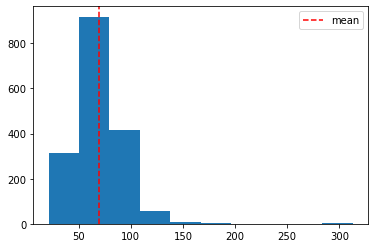

In [17]:
# 2. Impute with Logical assumption of value
# LotFrontage - (Continuous): Linear feet of street connected to property
# 330 NaN 
print(train_df.LotFrontage.isnull().sum())
plt.hist(x="LotFrontage", data=train_df);
plt.axvline(train_df.LotFrontage.mean(),0, ls='--', color='r', label="mean")
plt.legend()
# continuous variable and a skewed distribution. Impute with mean of population.
train_df.LotFrontage.fillna(train_df.LotFrontage.mean(), axis=0, inplace=True)

22


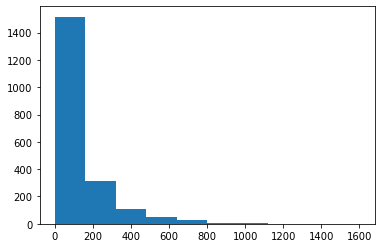

In [18]:
# 2. Impute with Logical assumption of value
# MasVnrArea - Mas Vnr Area (Continuous): Masonry veneer area in square feet
# 22 NaN
print(train_df.MasVnrArea.isnull().sum())
plt.hist(x="MasVnrArea", data=train_df);
# continuous variable. High frequency between 0 to 200, having 1 more is not a big difference
# Impute with 0
train_df.MasVnrArea.fillna(0, axis=0, inplace=True)

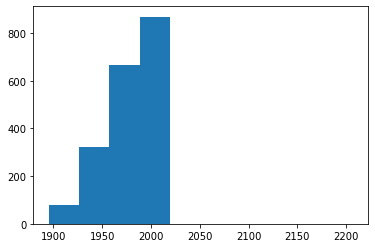

In [19]:
# 3. Impute with Logical assumption of value
# GarageYrBlt - Garage Yr Blt (Discrete): Year garage was built
# 114 NaN
# distribution before impute
plt.hist(x="GarageYrBlt", data=train_df);

In [20]:
# discrete variable, comparing with other garage related features show that they were all zero or None.
# thus safe to assume there is no garage and a logical value will be the year the house was built
train_df.loc[train_df.GarageYrBlt.isnull(), ['GarageYrBlt', 'GarageCars', 'GarageCars', 'GarageType', 'GarageCond',
                                             'GarageFinish', 'GarageQual', 'GarageArea', 'YearBuilt']]

GarageYrBlt  GarageCars  GarageCars GarageType GarageCond GarageFinish  \
28            NaN         0.0         0.0       None       None         None   
53            NaN         0.0         0.0       None       None         None   
65            NaN         0.0         0.0       None       None         None   
79            NaN         0.0         0.0       None       None         None   
101           NaN         0.0         0.0       None       None         None   
103           NaN         0.0         0.0       None       None         None   
114           NaN         0.0         0.0       None       None         None   
120           NaN         0.0         0.0       None       None         None   
134           NaN         0.0         0.0       None       None         None   
136           NaN         0.0         0.0       None       None         None   
139           NaN         0.0         0.0       None       None         None   
162           NaN         0.0         0.0       None       None         None   
235           NaN         0.0         0.0       None       None         None   
256           NaN         0.0         0.0       None       None         None   
260           NaN         0.0         0.0       None       None         None   
264           NaN         0.0         0.0       None       None         None   
276           NaN         0.0         0.0       None       None         None   
334           NaN         0.0         0.0       None       None         None   
356           NaN         0.0         0.0       None       None         None   
382           NaN         0.0         0.0       None       None         None   
406           NaN         0.0         0.0       None       None         None   
409           NaN         0.0         0.0       None       None         None   
426           NaN         0.0         0.0       None       None         None   
437           NaN         0.0         0.0       None       None         None   
445           NaN         0.0         0.0       None       None         None   
457           NaN         0.0         0.0       None       None         None   
486           NaN         0.0         0.0       None       None         None   
530           NaN         0.0         0.0       None       None         None   
542           NaN         0.0         0.0       None       None         None   
555           NaN         0.0         0.0       None       None         None   
562           NaN         0.0         0.0       None       None         None   
579           NaN         0.0         0.0       None       None         None   
580           NaN         0.0         0.0       None       None         None   
612           NaN         0.0         0.0       None       None         None   
636           NaN         0.0         0.0       None       None         None   
653           NaN         0.0         0.0       None       None         None   
663           NaN         0.0         0.0       None       None         None   
689           NaN         0.0         0.0       None       None         None   
692           NaN         0.0         0.0       None       None         None   
700           NaN         0.0         0.0       None       None         None   
705           NaN         0.0         0.0       None       None         None   
708           NaN         0.0         0.0       None       None         None   
722           NaN         0.0         0.0       None       None         None   
736           NaN         0.0         0.0       None       None         None   
741           NaN         0.0         0.0       None       None         None   
783           NaN         0.0         0.0       None       None         None   
787           NaN         0.0         0.0       None       None         None   
791           NaN         0.0         0.0       None       None         None   
814           NaN         0.0         0.0       None       None         None   
822   

114


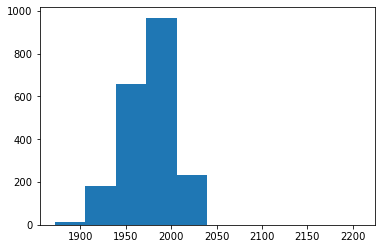

In [21]:
print(train_df.GarageYrBlt.isnull().sum())
# impute with YearBuilt
train_df.loc[train_df.GarageYrBlt.isnull(), ['GarageYrBlt']]=train_df.YearBuilt
# distribution after impute not much difference
plt.hist(x="GarageYrBlt", data=train_df);

In [22]:
#3. Impute with Zeros since there were less than 2 rows of NaN for each
# BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath, GarageCars, GarageArea
train_df.fillna(0, inplace=True)

In [23]:
# confirming all NaN is filled with 0
train_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemod/Add    0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

## Fix categorical ordinal data values

Here we refer to the data dictionary and found that some of the categorical ordinal features contain values that actually indicate a specific order or their values would trigger a different intepretation in pandas (e.g. 'N' will be interpreted as NaN). Thus, we need to do this step before treating the NaN as a whole.

We altered these values in the dataframe accordingly in order for these to be process properly as ordinals in subsequent steps. These features were:

`Lotshape`, `GarageFinish`, `GarageQual`, `LandSlope`, `ExterCond`, `ExterQual`, `BsmtCond`, `BsmtQual`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`, `HeatingQC`, `KitchenQual`, `FireplaceQu`, `Functional`, `CentralAir`, `PavedDrive`

In [24]:
# change values of ordinal features according to data dict
train_df["LotShape"].replace(["Reg", "IR1", "IR2", "IR3"], [4,3,2,1], inplace=True)
train_df["GarageFinish"].replace(["Fin", "RFn", "Unf", "None"], [4,3,2,1], inplace=True)
train_df["GarageQual"].replace(["Ex", "Gd", "TA", "Fa", "Po", "None"], [6,5,4,3,2,1], inplace=True)
train_df["GarageCond"].replace(["Ex", "Gd", "TA", "Fa", "Po", "None"], [6,5,4,3,2,1], inplace=True)
train_df["LandSlope"].replace(["Gtl", "Mod", "Sev"], [3,2,1], inplace=True)
train_df["ExterCond"].replace(["Ex", "Gd", "TA", "Fa", "Po"], [5,4,3,2,1], inplace=True)
train_df["ExterQual"].replace(["Ex", "Gd", "TA", "Fa", "Po"], [5,4,3,2,1], inplace=True)
train_df["BsmtCond"].replace(["Ex", "Gd", "TA", "Fa", "Po", "None"], [6,5,4,3,2,1,], inplace=True)
train_df["BsmtQual"].replace(["Ex", "Gd", "TA", "Fa", "Po", "None"], [6,5,4,3,2,1,], inplace=True)
train_df["BsmtExposure"].replace(["Gd", "Av", "Mn", "No", "None"], [5,4,3,2,1], inplace=True)
train_df["BsmtFinType1"].replace(["GLQ", "ALQ", "BLQ", "Rec", "LwQ", "Unf", "None"], [7,6,5,4,3,2,1], inplace=True)
train_df["BsmtFinType2"].replace(["GLQ", "ALQ", "BLQ", "Rec", "LwQ", "Unf", "None"], [7,6,5,4,3,2,1], inplace=True)
train_df["HeatingQC"].replace(["Ex", "Gd", "TA", "Fa", "Po"], [5,4,3,2,1], inplace=True)
train_df["KitchenQual"].replace(["Ex", "Gd", "TA", "Fa", "Po"], [5,4,3,2,1], inplace=True)
train_df["FireplaceQu"].replace(["Ex", "Gd", "TA", "Fa", "Po", "None"], [6,5,4,3,2,1,], inplace=True)
train_df["Functional"].replace(["Typ", "Min1", "Min2", "Mod", "Maj1", "Maj2", "Sev", "Sal"], [8,7,6,5,4,3,2,1,], inplace=True)
train_df["Electrical"].replace(["SBrkr", "FuseA", "FuseF", "FuseP", "Mix"], [5,4,3,2,1,], inplace=True)
train_df["Utilities"].replace(["AllPub", "NoSewr", "NoSeWa", "ELO"], [4,3,2,1,], inplace=True)

# PavedDrive - change Y, P, N to Paved, Partial, DirtGravel respectively because pandas treat N as NaN
train_df["PavedDrive"].replace(["Y", "P", "N"], [3,2,1], inplace=True)

# CentralAir - mapping 1/0 to Y/N on features with Yes/No bias
train_df["CentralAir"] = train_df["CentralAir"].map({'Y':1, 'N':0})

In [25]:
# confirm that all ordinal features with implied order are fixed
# and those without implied order are left alone
for e in cat_ordinal_feat_list:
    print(e, train_df[e].unique())

LotShape [3 4 2 1]
Utilities [4 2 3]
LandSlope [3 1 2]
OverallQual [ 6  7  5  8 10  4  9  3  2  1]
OverallCond [8 5 7 6 3 9 2 4 1]
ExterQual [4 3 5 2]
ExterCond [3 4 2 5 1]
BsmtQual [4 5 3 1 6 2]
BsmtCond [4 5 1 3 2 6]
BsmtExposure [2 5 4 1 3]
BsmtFinType1 [7 2 6 4 1 5 3]
BsmtFinType2 [2 4 1 5 7 3 6]
HeatingQC [5 3 4 2 1]
Electrical [5 3 4 2 1]
KitchenQual [4 3 2 5]
Functional [8 5 6 4 7 2 1 3]
FireplaceQu [1 4 5 2 6 3]
GarageFinish [3 2 4 1]
GarageQual [4 3 1 5 6 2]
GarageCond [4 3 1 2 5 6]
PavedDrive [3 1 2]


## Fix datatypes

In [26]:
def datatype_checker(dataframe):
    cat_count=0
    num_count=0
    df_cat_feat_list = []
    df_num_feat_list = []
    for c in dataframe:
        if dataframe[c].dtypes=="object":
            df_cat_feat_list.append(c)
            cat_count+=1
            if c not in cat_feat_list:
                print("dataframe is Cat feature object but data dict is not", c)
        elif dataframe[c].dtypes=="int64" or dataframe[c].dtypes=="float64":
            df_num_feat_list.append(c)
            num_count+=1
            if c not in num_feat_list:
                print("dataframe is Num feature int/float but data dict is not", c)
#    print("")
#    print("total categorical object type in dataframe", cat_count)
#    print(df_cat_feat_list)
#    print("")
#    print("total categorical nominal type in dataframe", num_count)
#    print(df_num_feat_list)

In [27]:
datatype_checker(train_df)

dataframe is Num feature int/float but data dict is not MSSubClass
dataframe is Num feature int/float but data dict is not LotShape
dataframe is Num feature int/float but data dict is not Utilities
dataframe is Num feature int/float but data dict is not LandSlope
dataframe is Num feature int/float but data dict is not OverallQual
dataframe is Num feature int/float but data dict is not OverallCond
dataframe is Num feature int/float but data dict is not ExterQual
dataframe is Num feature int/float but data dict is not ExterCond
dataframe is Num feature int/float but data dict is not BsmtQual
dataframe is Num feature int/float but data dict is not BsmtCond
dataframe is Num feature int/float but data dict is not BsmtExposure
dataframe is Num feature int/float but data dict is not BsmtFinType1
dataframe is Num feature int/float but data dict is not BsmtFinType2
dataframe is Num feature int/float but data dict is not HeatingQC
dataframe is Num feature int/float but data dict is not CentralAi

In [28]:
print(train_df.shape)
train_df.head()

(2051, 75)


MSSubClass MSZoning  LotFrontage  LotArea Street  LotShape LandContour  \
0          60       RL      69.0552    13517   Pave         3         Lvl   
1          60       RL      43.0000    11492   Pave         3         Lvl   
2          20       RL      68.0000     7922   Pave         4         Lvl   
3          60       RL      73.0000     9802   Pave         4         Lvl   
4          50       RL      82.0000    14235   Pave         3         Lvl   

   Utilities LotConfig  LandSlope Neighborhood Condition1 Condition2 BldgType  \
0          4   CulDSac          3       Sawyer       RRAe       Norm     1Fam   
1          4   CulDSac          3      SawyerW       Norm       Norm     1Fam   
2          4    Inside          3        NAmes       Norm       Norm     1Fam   
3          4    Inside          3       Timber       Norm       Norm     1Fam   
4          4    Inside          3      SawyerW       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemod/Add RoofStyle  \
0     2Story            6            8       1976           2005     Gable   
1     2Story            7            5       1996           1997     Gable   
2     1Story            5            7       1953           2007     Gable   
3     2Story            5            5       2006           2007     Gable   
4     1.5Fin            6            8       1900           1993     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual  \
0  CompShg     HdBoard     Plywood    BrkFace       289.0          4   
1  CompShg     VinylSd     VinylSd    BrkFace       132.0          4   
2  CompShg     VinylSd     VinylSd       None         0.0          3   
3  CompShg     VinylSd     VinylSd       None         0.0          3   
4  CompShg     Wd Sdng     Plywood       None         0.0          3   

   ExterCond Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          3     CBlock         4         4             2             7   
1          3      PConc         5         4             2             7   
2          4     CBlock         4         4             2             7   
3          3      PConc         5         4             2             2   
4          3      PConc         3         5             2             2   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
0       533.0             2         0.0      192.0        725.0    GasA   
1       637.0             2         0.0      276.0        913.0    GasA   
2       731.0             2         0.0      326.0       1057.0    GasA   
3         0.0             2         0.0      384.0        384.0    GasA   
4         0.0             2         0.0      676.0        676.0    GasA   

   HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0          5           1           5       725       754             0   
1          5           1           5       913      1209             0   
2          3           1           5      1057         0             0   
3          4           1           5       744       700             0   
4          3           1           5       831       614             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1479           0.0           0.0         2         1             3   
1       2122           1.0           0.0         2         1             4   
2       1057           1.0           0.0         1         0             3   
3       1444           0.0           0.0         2         1             3   
4       1445           0.0           0.0         2         0             3   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             1            4             6           8           0   
1             1            4             8           8           1   
2             1            4             5           8           0   
3             1            3             7           8 

**Observation**

From above we discovered that `MSSubClass` was actually categorical according to data dictionary, we re-typed these to `object` so get_dummies encoding will work later.

As for the rest, they were catergorical ordinal features that were imputed with numerals according to their implied ranking or Y/N meaning in data dictionary. As a result of this, their datatypes were changed to int/float. We do not need to address these as this was done to ensure that encoding works fine later on.

In [29]:
# re-type MSSubClass
train_df["MSSubClass"] = train_df["MSSubClass"].astype("object")

# Exploratory Discovery and Analysis (EDA)

Here we go deeper to analyze the features for

    - look at basic statistic and distribution of dependent target, SalePrice
    - missing values and imputing them appropriately
    - identifying and addressing outliers
    - clean up other issues discovered post data cleaning step

This EDA step would give us a first cut selection of features that are most likely to have an impact on SalePrice.

## Exploring distribution of SalePrice - First Look

Before going further, let's get a sense of the distribution of SalePrice.

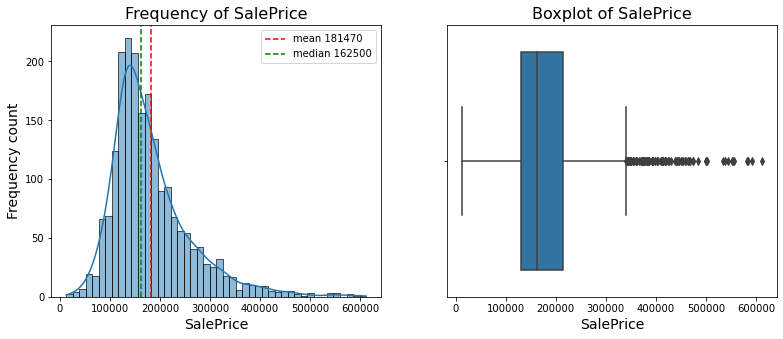

In [30]:
# plots for SalePrice
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(13,5))

sns.histplot(train_df["SalePrice"], kde=True, ax=ax1)
ax1.set_title("Frequency of SalePrice", fontsize=16 )
ax1.set_xlabel("SalePrice", fontsize=14)
ax1.set_ylabel('Frequency count', fontsize=14)
meantxt=str(round(train_df["SalePrice"].mean()))
ax1.axvline(train_df["SalePrice"].mean(), ls='--', color='r', label='mean '+meantxt)
mediantxt=str(round(train_df["SalePrice"].median()))
ax1.axvline(train_df["SalePrice"].median(), ls='--', color='g', label='median '+mediantxt)
ax1.legend()

sns.boxplot(x="SalePrice", data=train_df, orient="h", ax=ax2)
ax2.set_title("Boxplot of SalePrice", fontsize=16 )
ax2.set_xlabel("SalePrice", fontsize=14)
plt.show()

In [31]:
train_df[["SalePrice"]].describe()

SalePrice
count    2051.000000
mean   181469.701609
std     79258.659352
min     12789.000000
25%    129825.000000
50%    162500.000000
75%    214000.000000
max    611657.000000

**Observation**

Initial data cleaning showed that a number of features had missing values, which would need to be managed appropriately before modelling.  Before doing this we examined the target variable’s (i.e. the SalesPrice) descriptive statistics.

A mean sale price of 181,470 and median of 162,500 on the histogram indicated positive skew. Sale prices range from 12,789 to 611,657 with the 95th percentile in the boxplot that was considerably lesser than the maximum sale price, indicating a numbers of outliers need to be treated.

## Categorical features EDA

Here we choose to make plots of histogram and boxplot against saleprice to assist in the EDA.

In each of the frequency plots, we added a horizontal line which was the 50% count of the feature to assist in visualizing any features that exhibit a strong bias towards certain selections. These features are considered to be contributing to the skew in SalePrice distribution and should be removed from consideration.

In the box plots, we were able to visualized the extremity of outliers in the features to consider for removal or treatment on those extremities.

In [32]:
# define a function to plot
def cat_plotter(x_feature, y_feature, data):
    
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(13,5))

    sns.countplot(x=x_feature, data=data.iloc[:,:-1], ax=ax1,  # leave out saleprice
                  order = data[x_feature].value_counts().index)
    ax1.set_title("Frequency of feature (sorted)", fontsize=16 )
    ax1.set_xlabel(x_feature, fontsize=13)
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
    ax1.set_ylabel('Frequency count', fontsize=13)    
    ax1.axhline(data[x_feature].value_counts().max()/2, ls='--', color='r', label='50% count')
    ax1.legend()

    sns.boxplot(x=x_feature, y=y_feature, data=data, ax=ax2)
    ax2.set_title("Boxplot of feature", fontsize=16 )
    ax2.set_xlabel(x_feature, fontsize=13)
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)
    ax2.set_ylabel(y_feature, fontsize=13)
    plt.show()

41


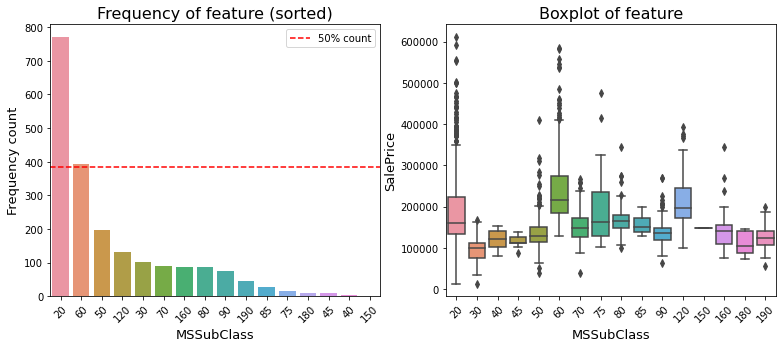

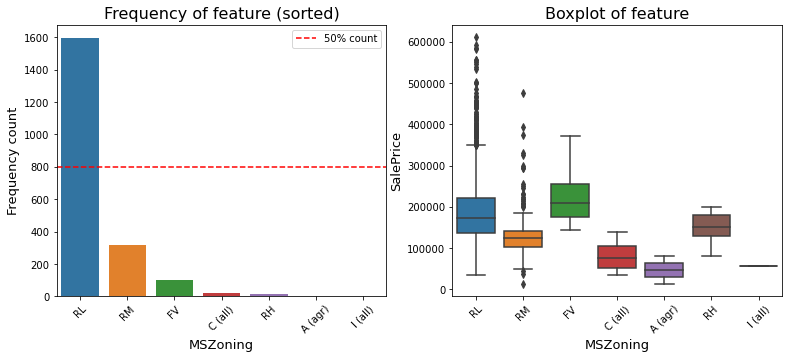

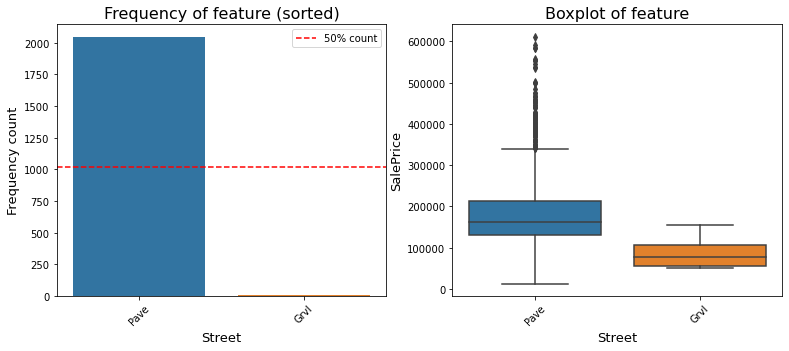

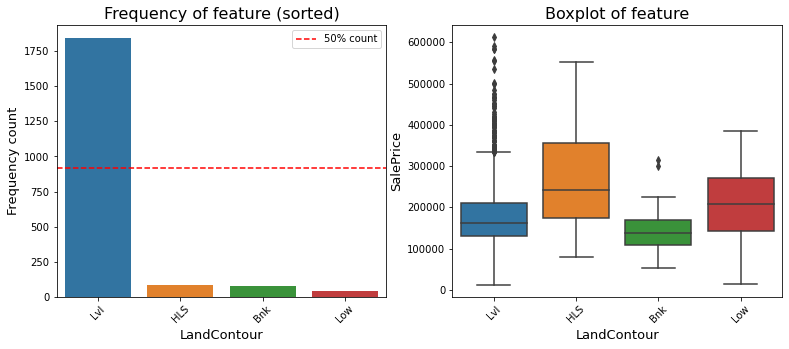

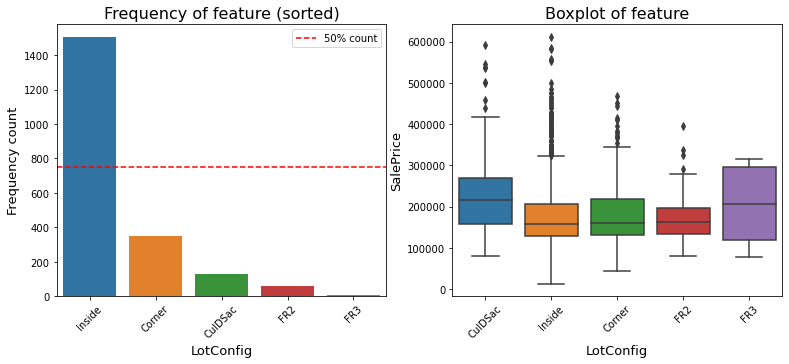

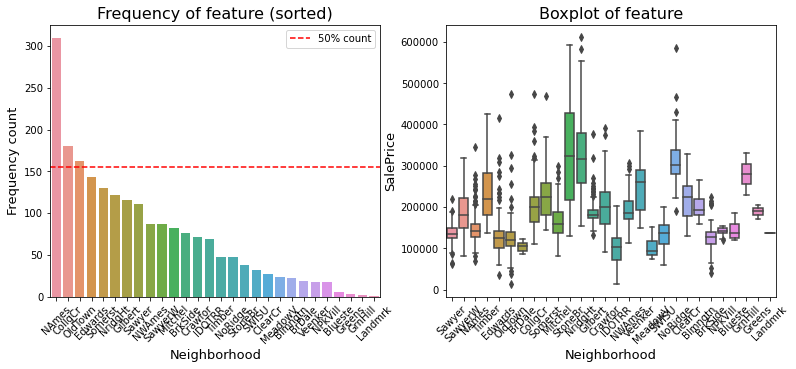

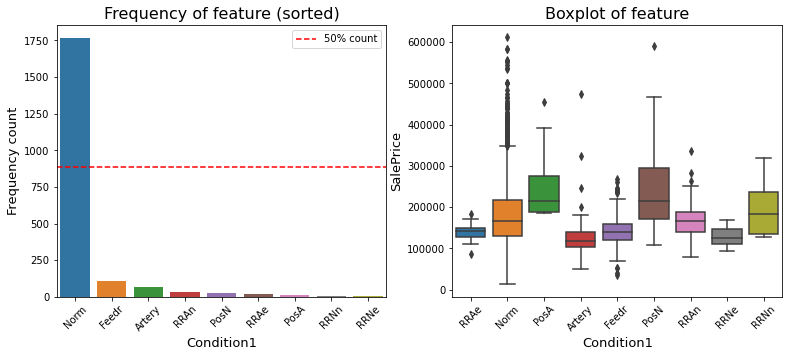

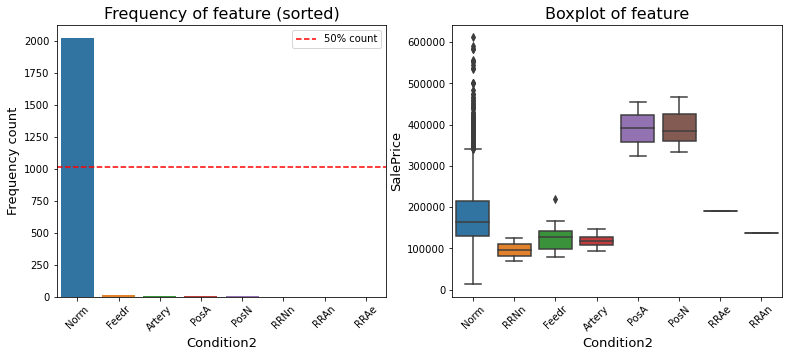

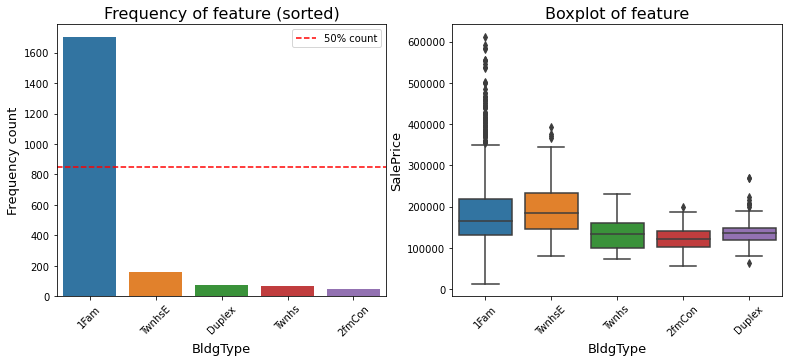

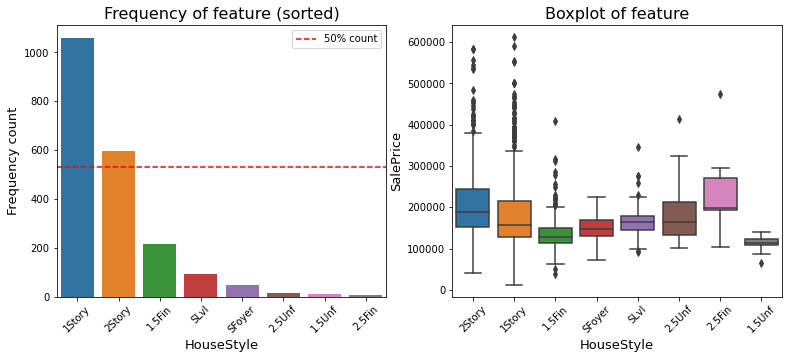

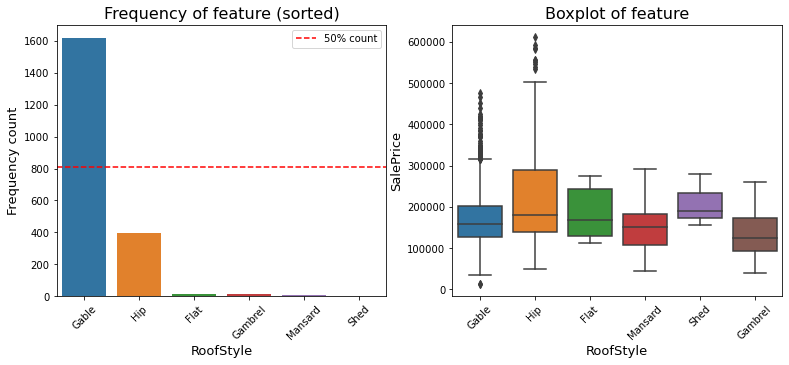

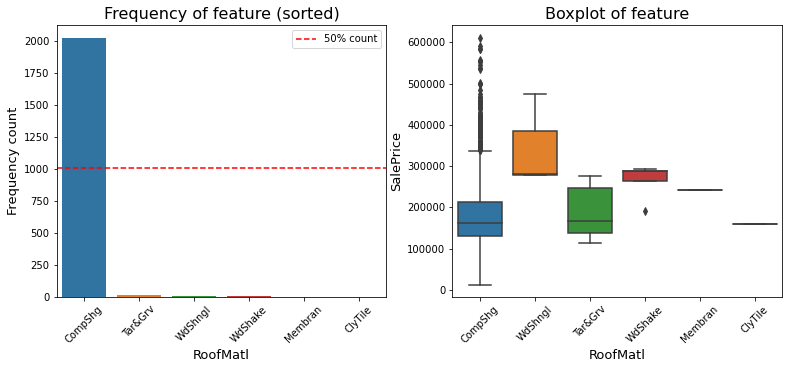

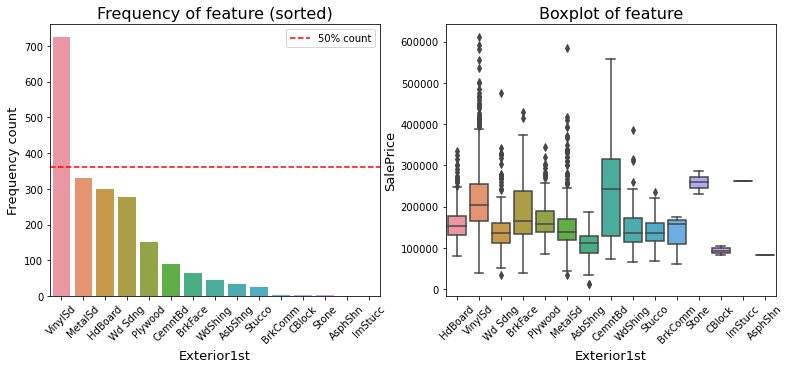

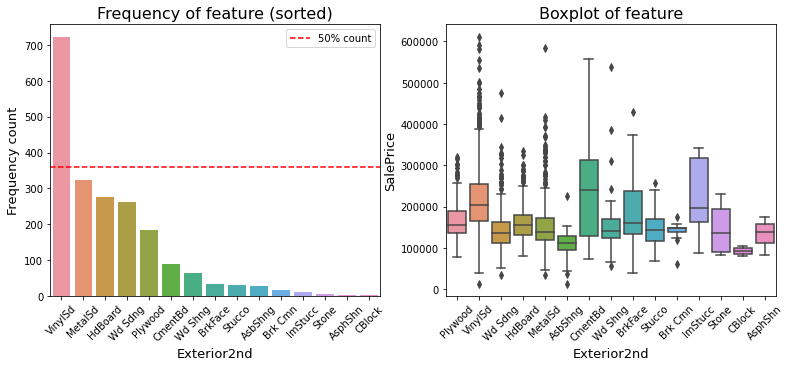

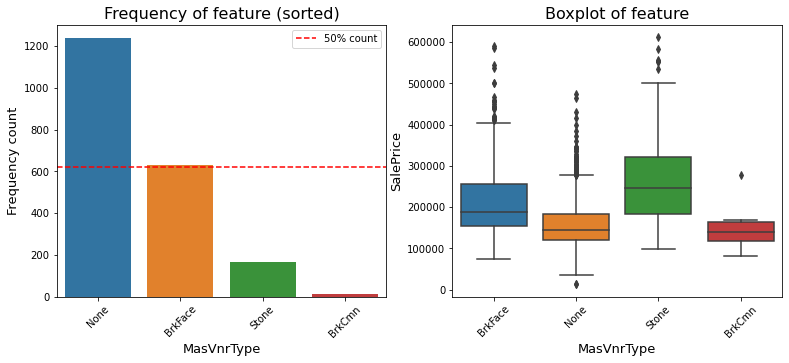

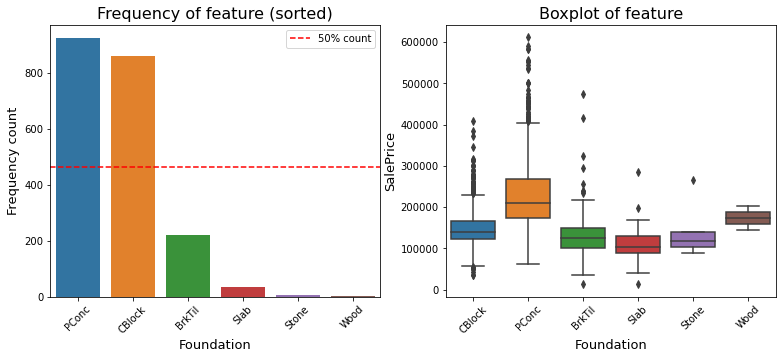

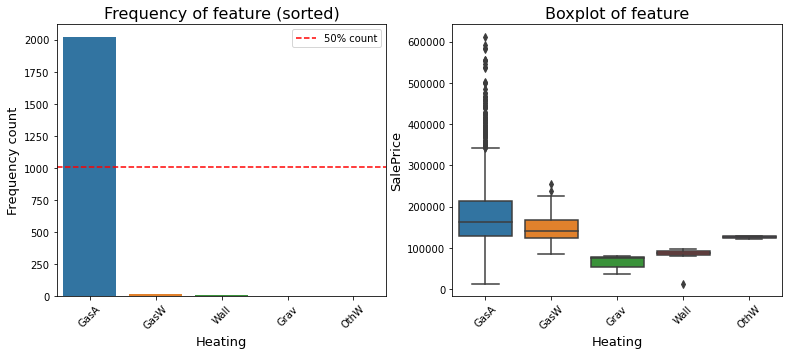

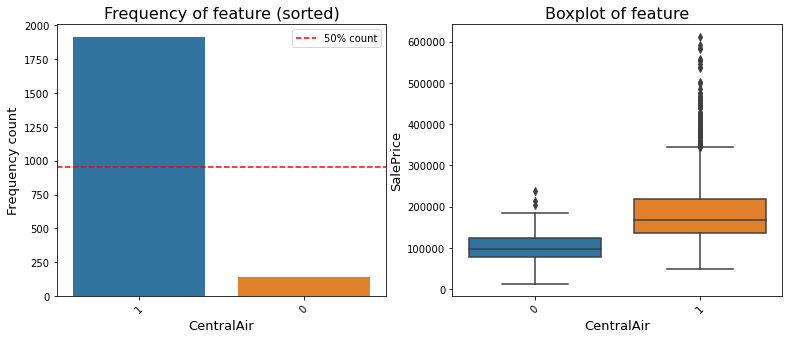

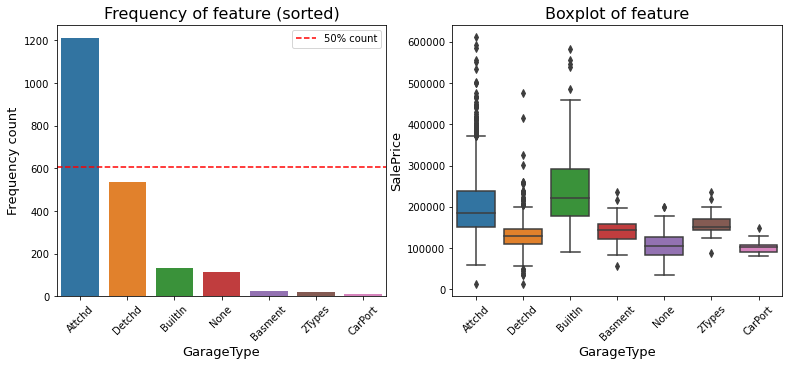

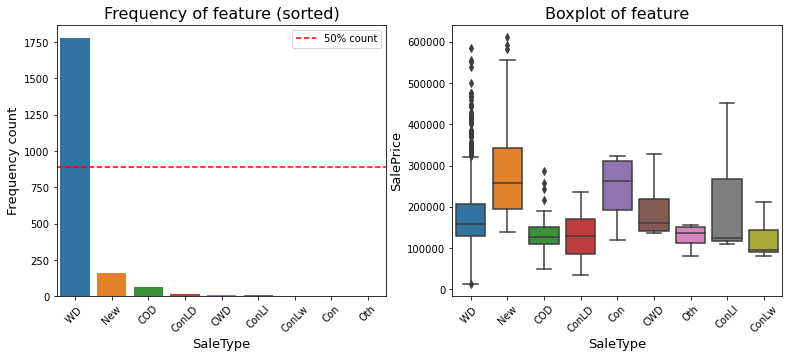

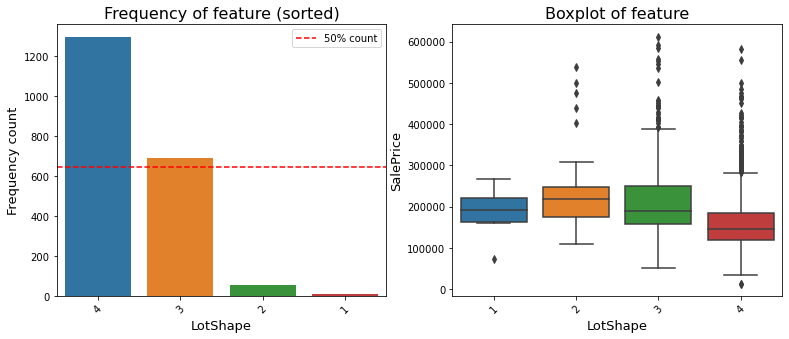

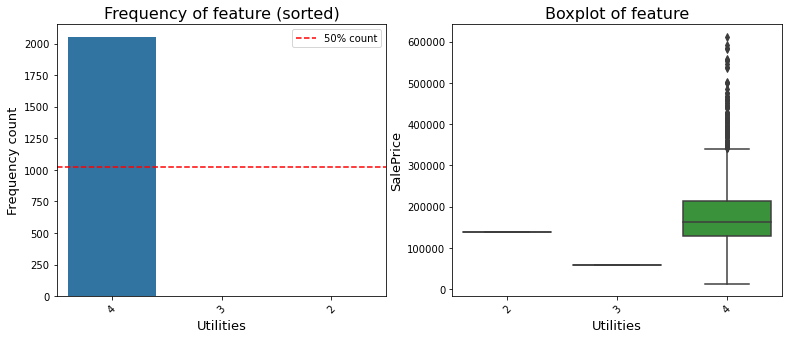

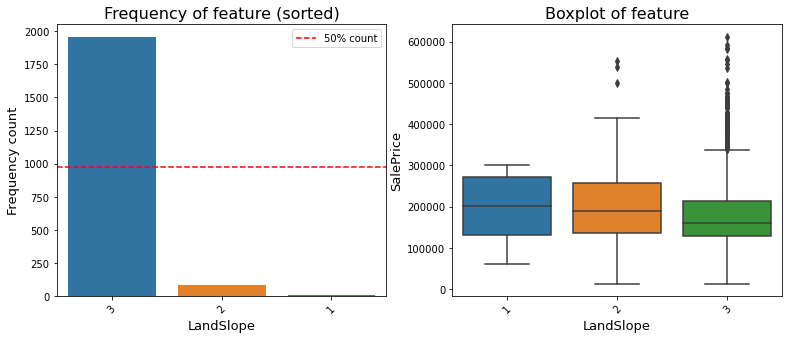

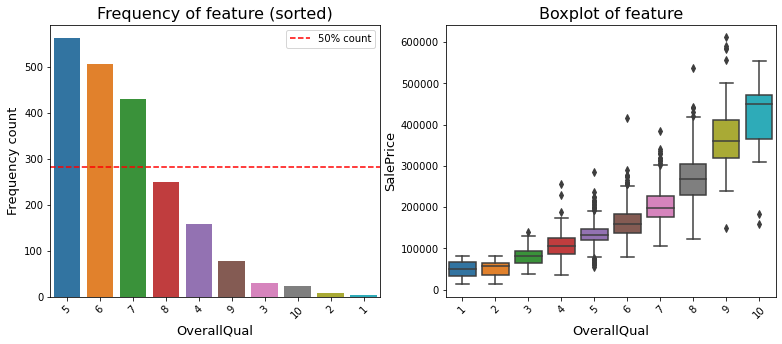

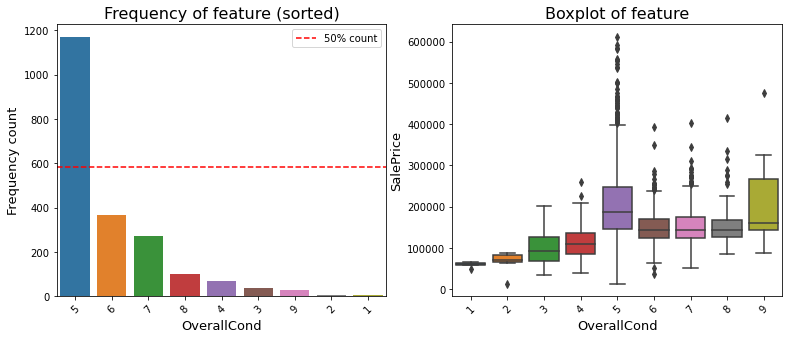

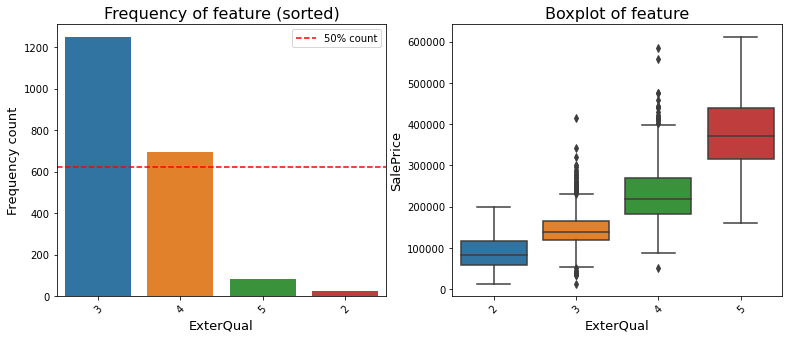

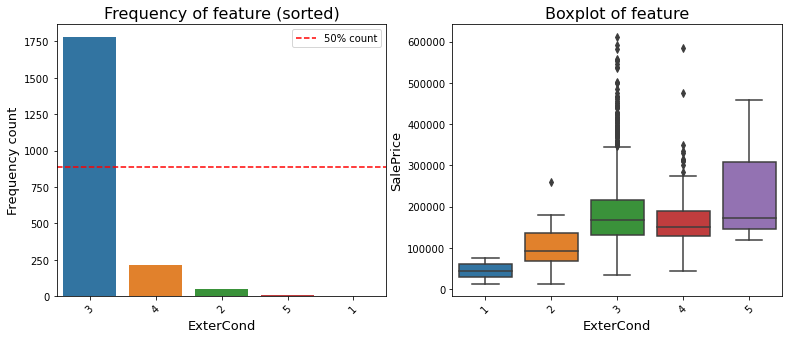

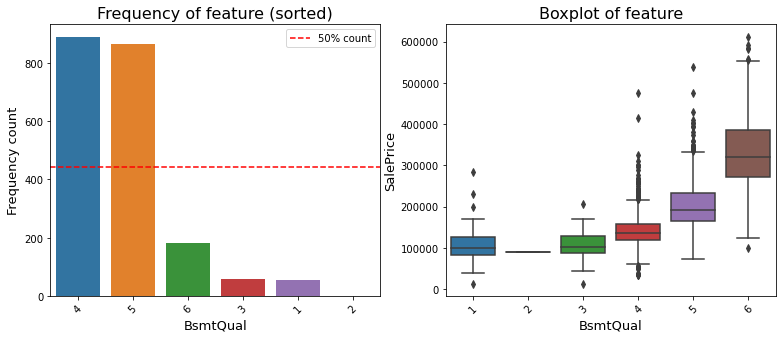

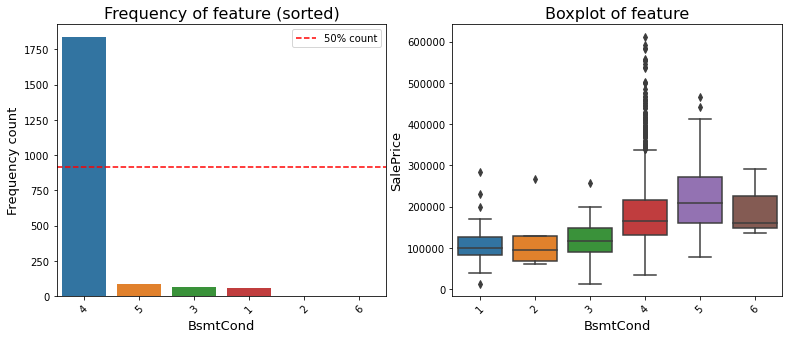

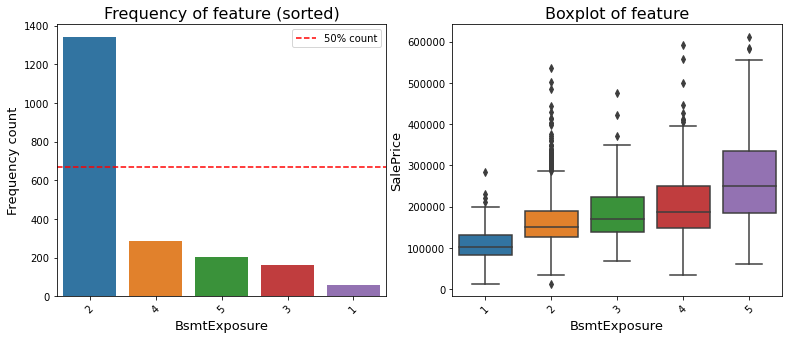

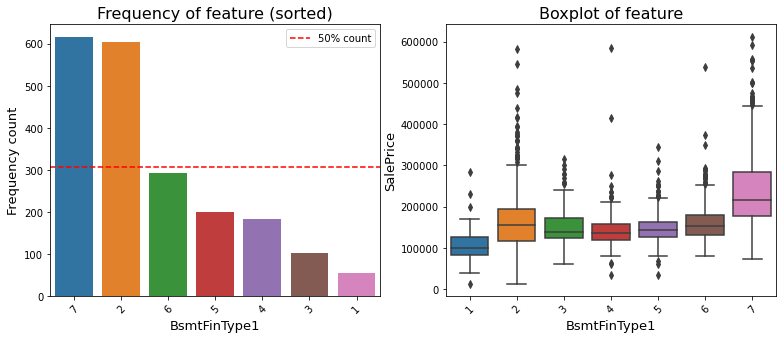

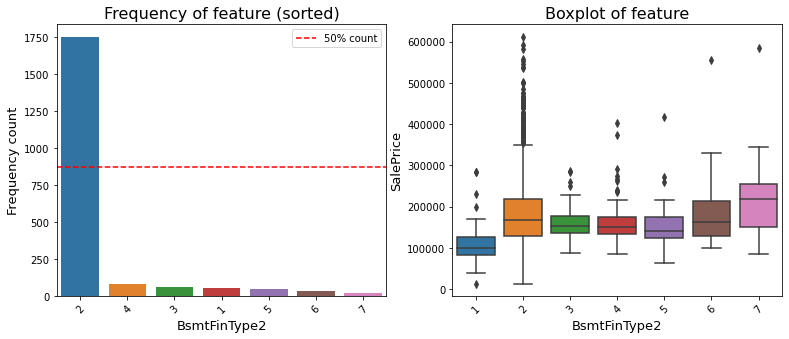

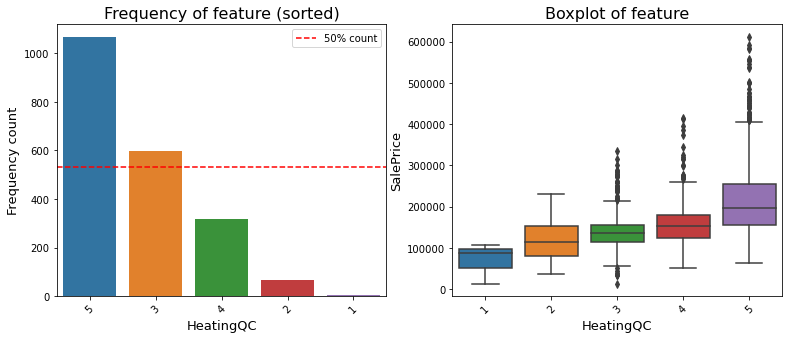

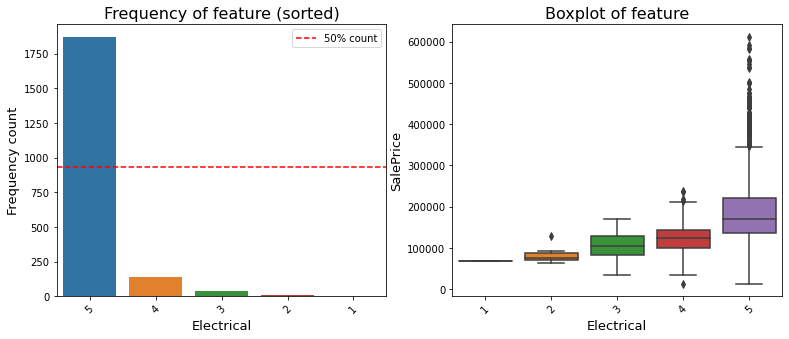

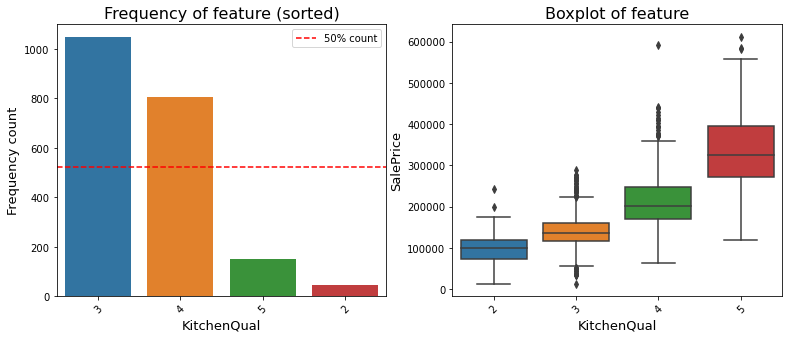

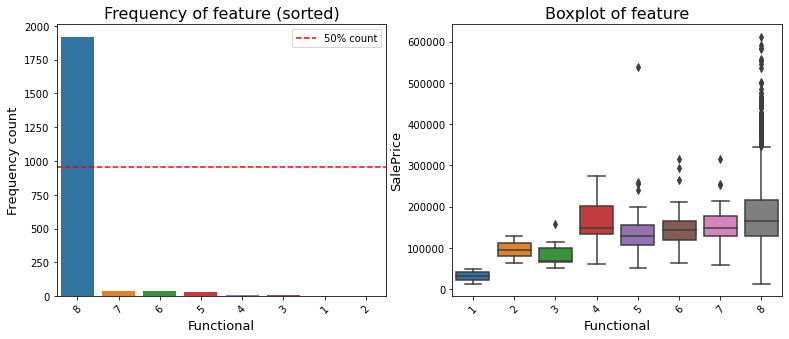

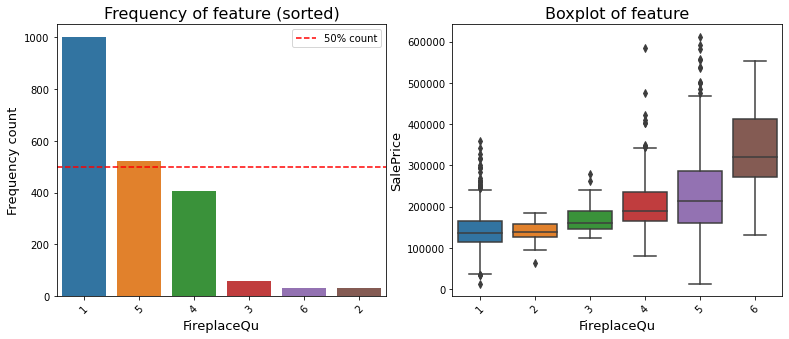

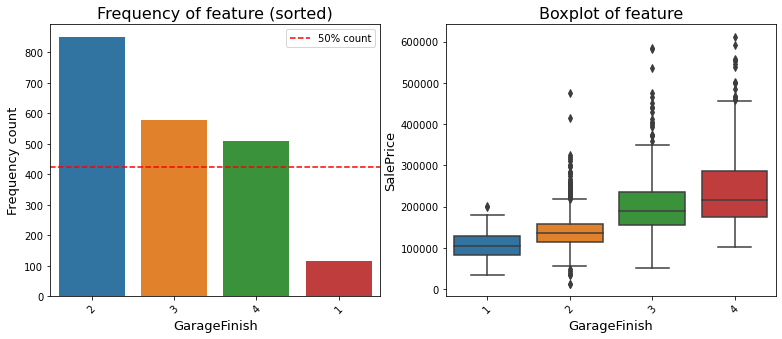

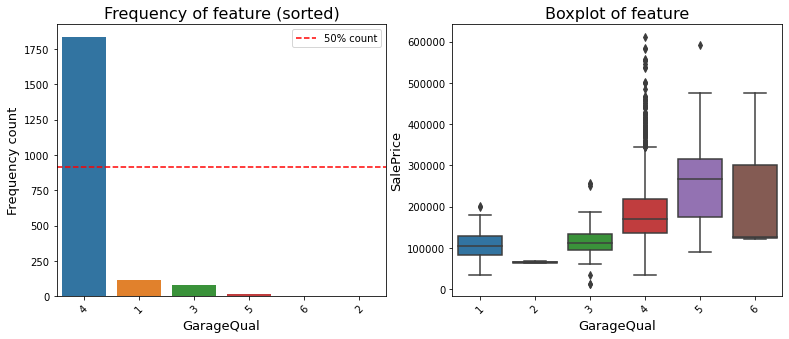

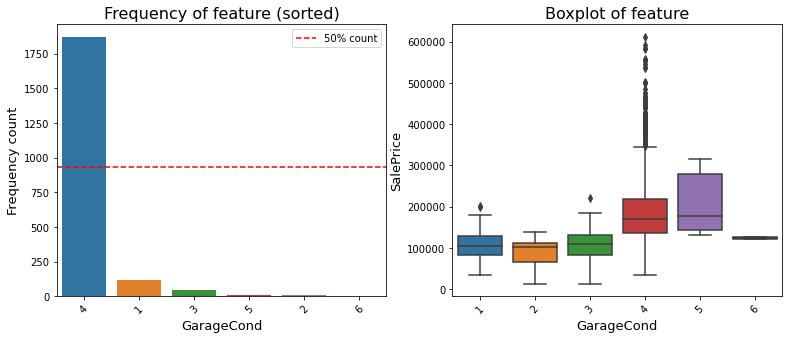

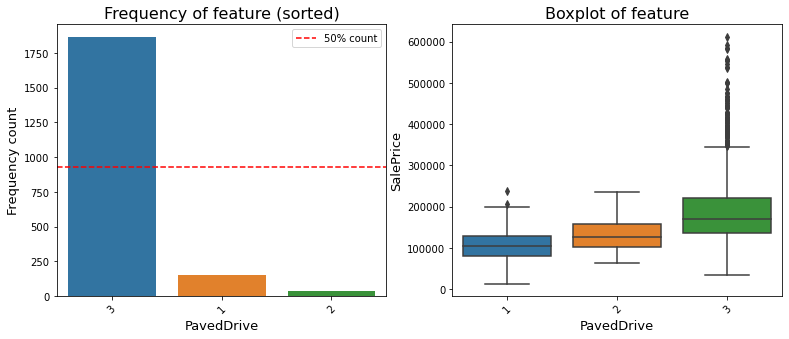

In [33]:
print(len(cat_feat_list))
for c in cat_feat_list:
    cat_plotter(c, "SalePrice", train_df)

**Observation**

Analyzing the plots for each feature, we excluded the following because they exhibited strong bias (i.e. around 50% concentration) towards a sub-category that was likely to skew the saleprice distribution. Features with high frequencies were observed to be having a lot of outliers in the boxplots too.

`Street`, `LandContour`, `LotConfig`, `Condition1`, `Condition2`, `SaleType`, `RoofStyle`, `Heating`, `Utilities`, `LandSlope`, `ExterCond`, `BsmtCond`, `BsmtExposure`, `BsmtFinType2`, `Electrical`, `Functional`, `GarageQual`, `GarageCond`, `PavedDrive`, `BldgType`, `RoofMatl`, `CentralAir`

**22 features excluded**

We included the following because they have more distinct categories and did not appear to had a strong bias (i.e. <50% concentration). We also noted the outliers in these that we may have to treat them in the next steps.

`MSSubClass`, `MSZoning`, `Neighborhood`, `HouseStyle`,`Exterior1st`, `Exterior2nd`, `MasVnrType`, `GarageType`, `Foundation`, `LotShape`, `OverallQual`, `OverallCond`, `ExterQual`, `BsmtQual`,  `BsmtFinType1`,  `HeatingQC`, `KitchenQual`, `FireplaceQu`,  `GarageFinish`

**Shortlisted - 19 features**

In [34]:
# adding the shortlisted categorical features into the final shortlist

shortlist_cat_feat_list = ["MSSubClass", "MSZoning", "Neighborhood", "HouseStyle", "Exterior1st",
                           "Exterior2nd", "MasVnrType", "GarageType", "Foundation", "LotShape",
                           "OverallQual", "OverallCond", "ExterQual", "BsmtQual", "BsmtFinType1", 
                           "HeatingQC", "KitchenQual", "FireplaceQu", "GarageFinish"]

## Numerical features EDA

Here we choose to make plots of histogram and boxplot against saleprice to assist in the EDA.

In each of the coountplots, we added a horizontal line which was the 50% count of the feature to assist in visualizing any features that exhibit a strong bias towards certain selections. These features are considered to be contributing to the skew in SalePrice distribution and should be considered for removal.

In the regplots, we were able to visualized the extremity of outliers in the features to consider for removal or treatment on those extremities.

### Discrete features shortlisting

In [35]:
# define a function to plots
def num_plotter(x_feature, y_feature, data):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

    sns.regplot(x=x_feature, y=y_feature, data=data, ax=ax1,
                color="g", line_kws={'color': 'r'}, scatter_kws={'linewidth':1})
    ax1.set_title("Scatterplot of feature vs SalePrice", fontsize=16)
    ax1.set_xlabel(x_feature, fontsize=13)
    ax1.set_ylabel(y_feature, fontsize=13)
    
    sns.countplot(x=x_feature, data=data, ax=ax2)
    ax2.set_title("Frequency plot of feature", fontsize=16 )
    ax2.set_xlabel(x_feature, fontsize=13)
    ax2.axhline(data[x_feature].value_counts().max()/2, ls='--', color='r', label='50% count')
    ax2.legend()    
    plt.show()

13


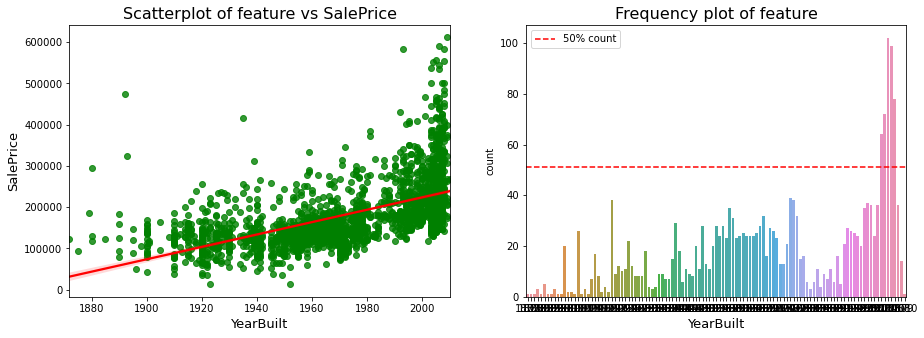

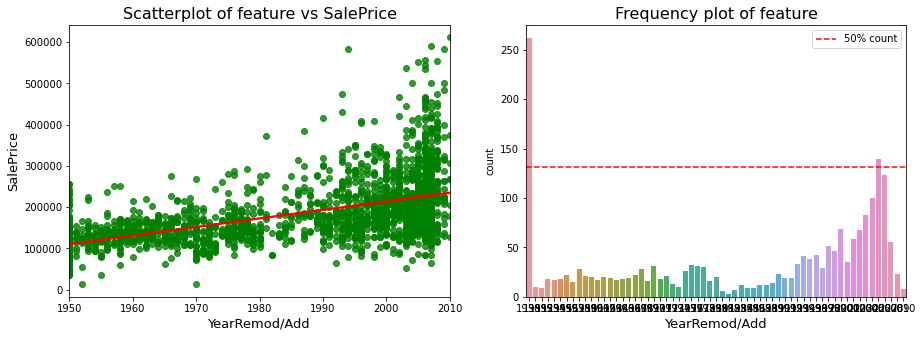

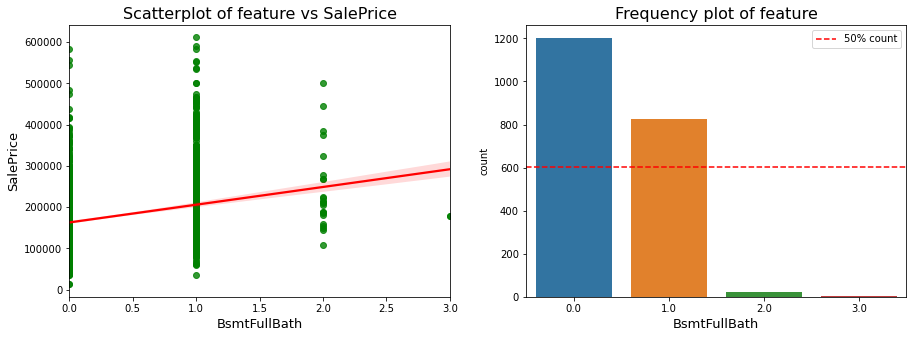

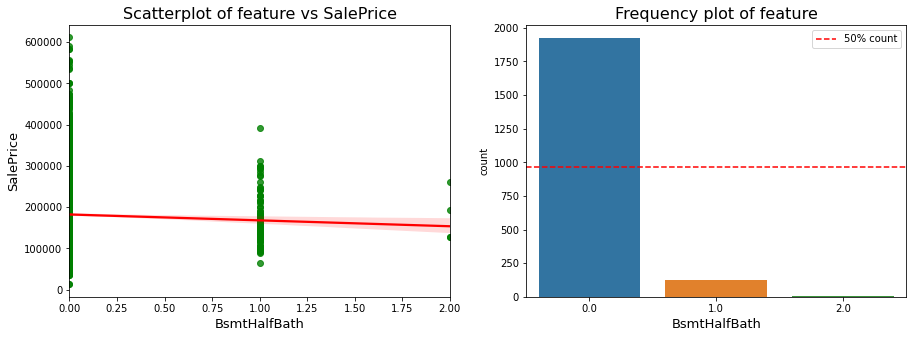

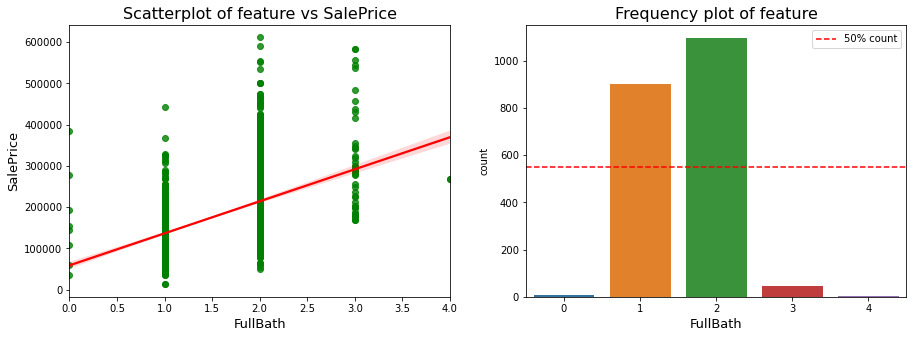

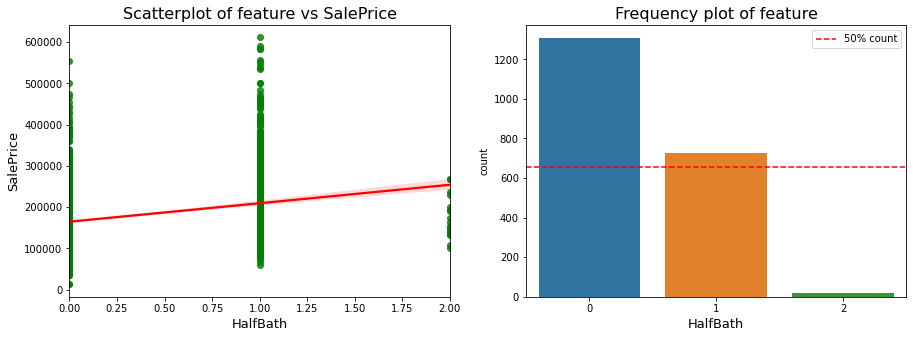

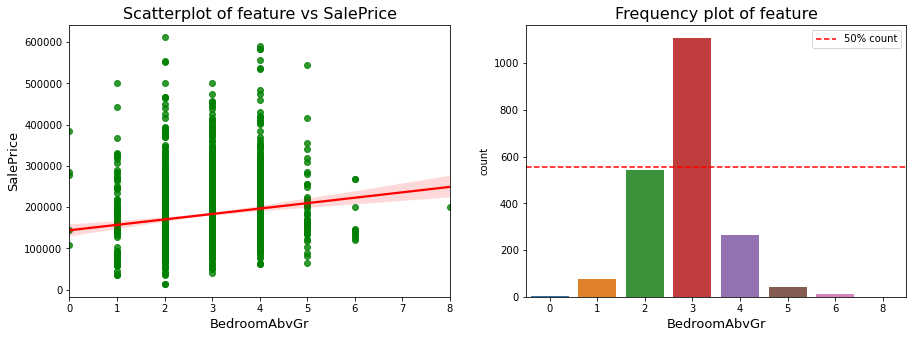

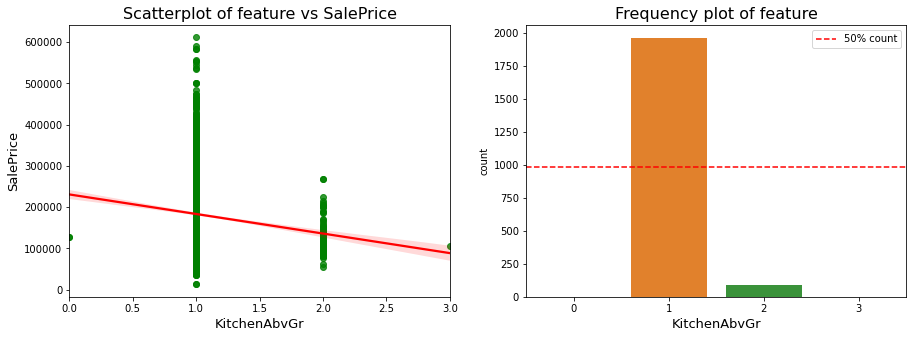

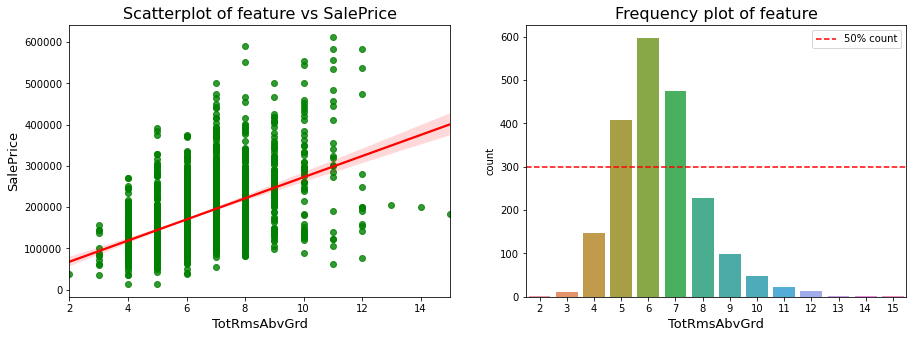

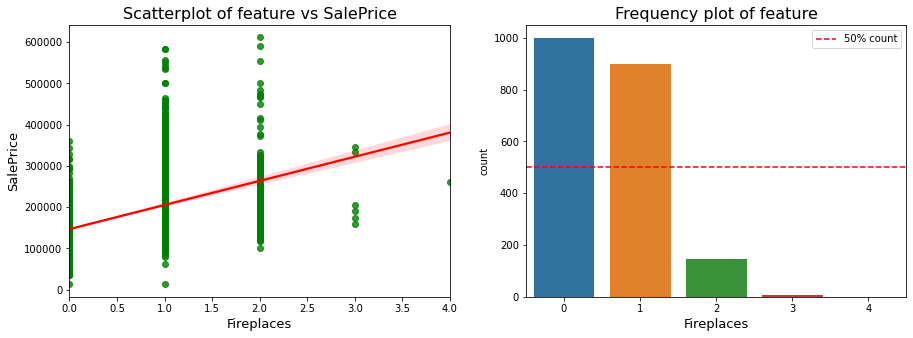

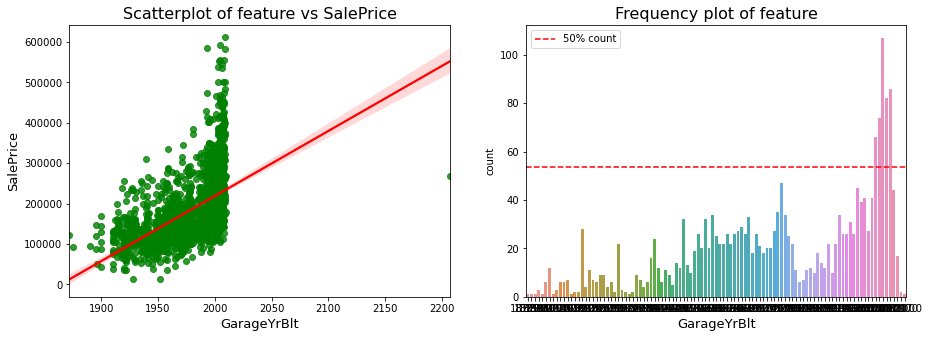

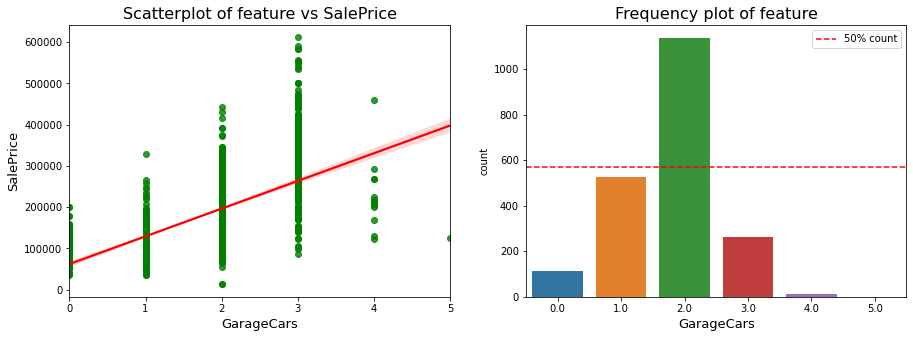

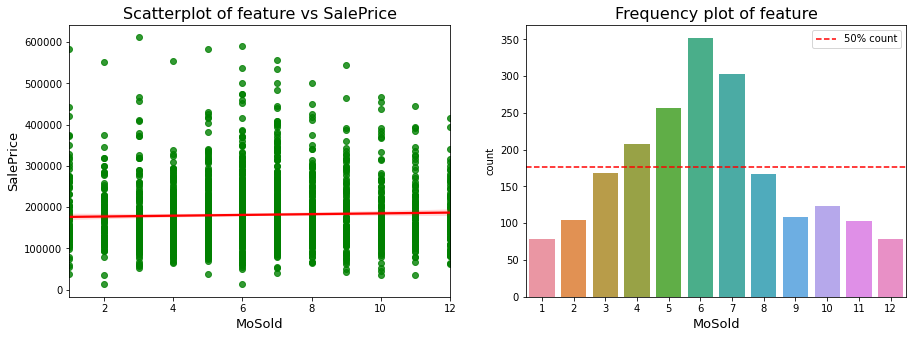

In [36]:
# plotting all numerical discrete features
scatter_list = num_discrete_feat_list[:-1] # exclude SalePrice column
print(len(scatter_list))
for c in scatter_list:
    num_plotter(c, "SalePrice", train_df)

**Observation**

From the plots, we observed that `YearBuilt` `YearRemod/Add` and `GarageYrBlt` had showed a clear positive linear relationship to saleprice.

    - YearRemod/Add had a concentration of values in the year 1950 that may need to be treated.    
    - GarageYrBlt had an irregular outlier in the future year and since it is only 1 row, we will drop the row.

`BsmtFullBath` `FullBath` `HalfBath` `BedroomAbvGr` `TotRmsAbvGrd` `Fireplaces` and `GarageCars` had positive linear relationship to saleprice as the discrete value increased. Intuitively, in the real world, as the value of these features increase. It was also likely that the sale prices will trend upwards as well. (e.g. more Bedrooms or more car capacity in the garage usually fetch a higher price). Although `BsmtFullBath` `BedroomAbvGr` `KitchenAbvGr` showed that there were strong bias toward a sub-category. Upon reading the data dictionary, we found these to be logical discrete values. Hence we kept them in the selection list.

`BmstHalfBath` and `KitchenAbvGr` had negative linear relationship to saleprice as the discrete value increased.

`MoSold` had almost a flat relationship to saleprice. This was another obvious feature to drop because it did not demonstrate any impact to saleprice.

Features that demonstrated some form of positive/negative linear relationship to saleprice were shortlisted. They were:

`YearBuilt` `YearRemod/Add` `BsmtFullBath` `BsmtHalfBath` `FullBath` `HalfBath` `BedroomAbvGr` `KitchenAbvGr` `TotRmsAbvGrd` `Fireplaces` `GarageYrBlt` `GarageCars` `MoSold`

**Shortlisted - 13 features**

Here we treated the issues identified above.

In [37]:
# locate the irregular record
train_df[train_df["GarageYrBlt"] > 2020][["GarageYrBlt", "YearBuilt"]]

GarageYrBlt  YearBuilt
1699       2207.0       2006

In [38]:
# get index, drop, re-index
index_temp = train_df[train_df["GarageYrBlt"] > 2020][["GarageYrBlt", "YearBuilt"]].index
train_df.drop(index_temp, axis=0, inplace=True)
train_df.reindex

<bound method DataFrame.reindex of      MSSubClass MSZoning  LotFrontage  LotArea Street  LotShape LandContour  \
0            60       RL      69.0552    13517   Pave         3         Lvl   
1            60       RL      43.0000    11492   Pave         3         Lvl   
2            20       RL      68.0000     7922   Pave         4         Lvl   
3            60       RL      73.0000     9802   Pave         4         Lvl   
4            50       RL      82.0000    14235   Pave         3         Lvl   
...         ...      ...          ...      ...    ...       ...         ...   
2046         20       RL      79.0000    11449   Pave         3         HLS   
2047         30       RL      69.0552    12342   Pave         3         Lvl   
2048         50       RL      57.0000     7558   Pave         4         Bnk   
2049         20       RL      80.0000    10400   Pave         4         Lvl   
2050         60       RL      60.0000     7500   Pave         4         Lvl   

      Utilities 

In [39]:
# confirm deleted
train_df[train_df["GarageYrBlt"] > 2020][["GarageYrBlt", "YearBuilt"]]
train_df.shape

(2050, 75)

In [40]:
# update shortlist_num_feat_list with selected numerical discrete features
shortlist_num_feat_list = ['YearBuilt', 'YearRemod/Add', 'BsmtFullBath', 'BsmtHalfBath',
                            'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
                            'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
                            'MoSold']
shortlist_num_feat_list.append("SalePrice") # adding saleprice
print(len(shortlist_num_feat_list))
print(shortlist_num_feat_list)

14
['YearBuilt', 'YearRemod/Add', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'SalePrice']


### Continuous features shortlisting

Here we choose to make plots of Seaborn's regplot and stripplot against saleprice to assist in the EDA.

In the regplots, we can see the effect of the outliers and zero values as depicted by the diverging fan of the regression line. The bigger the red shaded area mean the bigger effect these outliers and zero values had on the saleprice variation. 

Next we used stripplot with additional 3 vertical lines to assist in determining the maximum threshold value to use for treating outliers. Although an overlay of swarmplot over a boxlot would be a better choice of graphic. It was not possible here due to having over 2000 data points that could not fit nicely into the constraint figure size. Thus, we calculated the threshold and plotted the overlay. Thresholds were calculated as follows:

    - IQR = 75% quartile - 25% quantile
    - Max threshold = 75% quantile + 1.5 * IQR (note: anything above this is an outlier and should be treated)
    - Min threshold = 25% quantile - 1.5 * IQR (note that this may not always max sense here as there was no zero saleprice
    - median = 50% quantile
    - mean = mean of population

In [41]:
# define a function to plots
def num_con_plotter(x_feature, y_feature, data):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

    sns.regplot(x=x_feature, y=y_feature, data=data, ax=ax1,
                color="g", line_kws={'color': 'r'}, scatter_kws={'linewidth': 1, 'alpha': 0.4})
    ax1.set_title("Regplot of feature vs SalePrice", fontsize=16)
    ax1.set_xlabel(x_feature, fontsize=13)
    ax1.set_ylabel(y_feature, fontsize=13)
    
    # note: cannot use a swarmplot overlay on boxplot here cos too many data points resulting
    # in overflow that cannot display within the figsize
    sns.stripplot(x=x_feature, data=data, ax=ax2, color="r", linewidth=1, alpha=0.4)
    ax2.set_title("Stripplot of feature", fontsize=16 )
    ax2.set_xlabel(x_feature, fontsize=13)
    
    IQR = np.quantile(data[x_feature], 0.75) - np.quantile(data[x_feature], 0.25)
    max_threshold = round(np.quantile(data[x_feature], 0.75) + 1.5*IQR)
    min_threshold = round(np.quantile(data[x_feature], 0.25) - 1.5*IQR)
    median = round(np.quantile(data[x_feature].median(), 0.5))
    mean = round(np.mean(data[x_feature]))
    ax2.axvline(max_threshold, ls='--', color='r', label='max threshold = '+str(max_threshold))
    ax2.axvline(min_threshold, ls='--', color='r', label='min threshold = '+str(min_threshold))
    ax2.axvline(median, ls='--', color='g', label='median = '+str(median))
    ax2.axvline(mean, ls='--', color='black', label='mean = '+str(mean))
    ax2.legend()
    
    # calculate the number of zeros and display on plot
    no_zeros = (data[x_feature]==0).sum()
    ax2.text(0.7, 0.1, "no. of zeros = "+ str(no_zeros), fontsize=13, ha='center', va='center', transform=ax2.transAxes)
    
    plt.show()

19


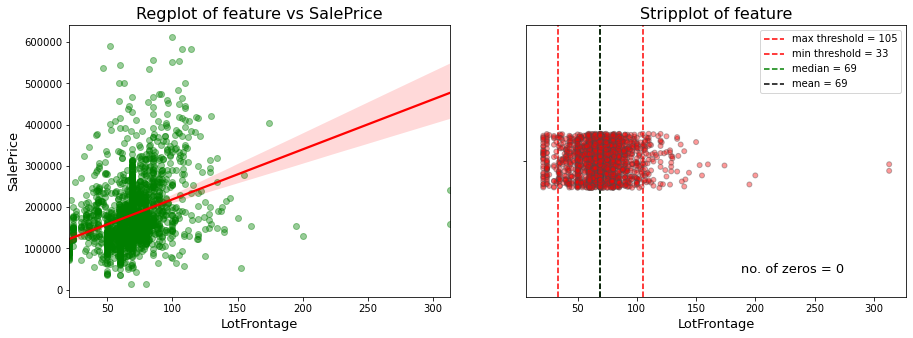

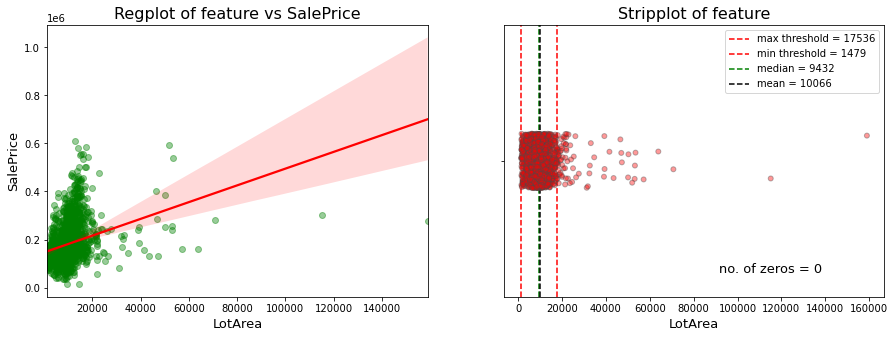

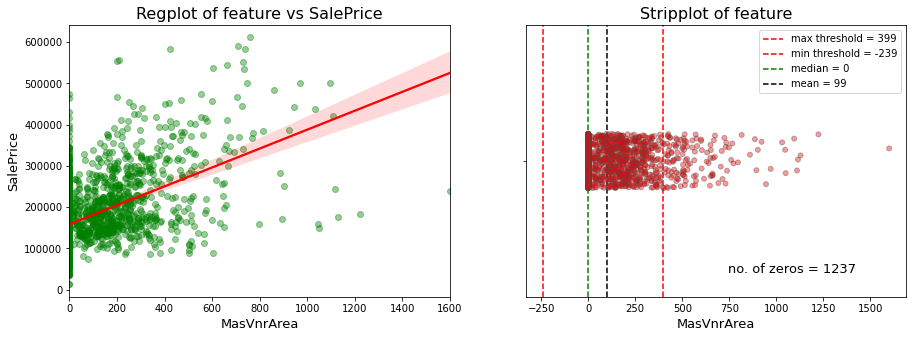

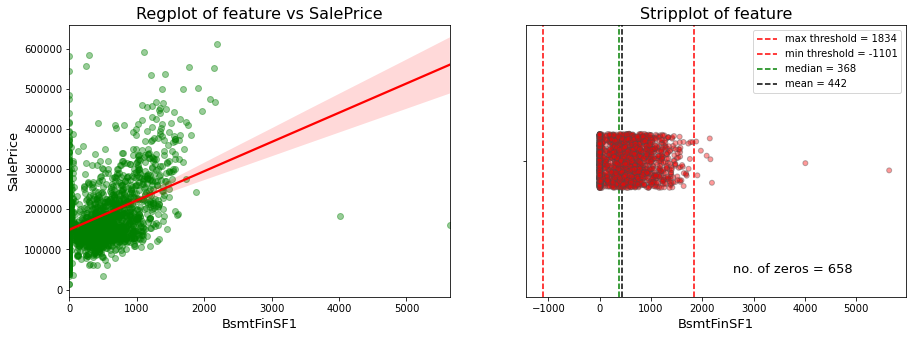

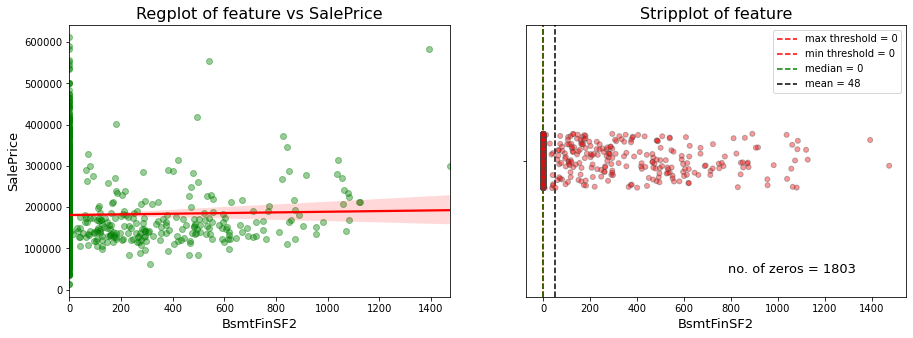

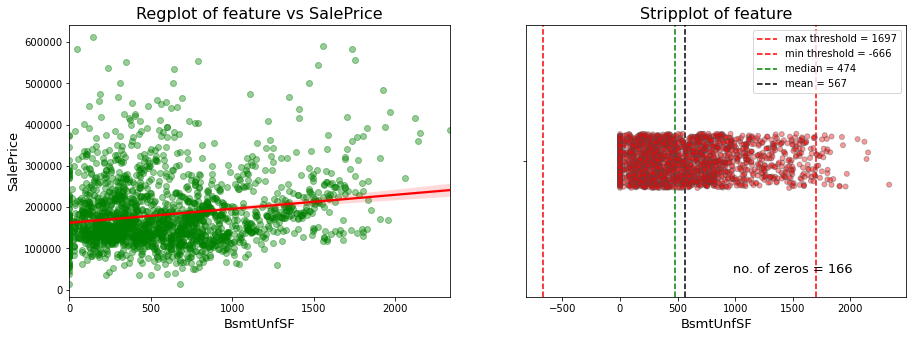

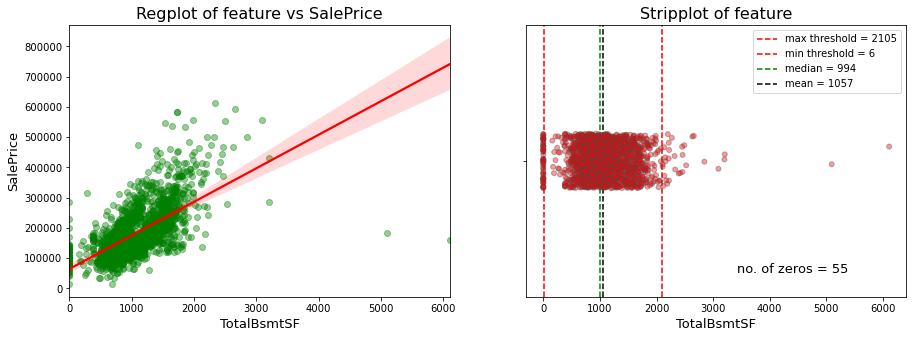

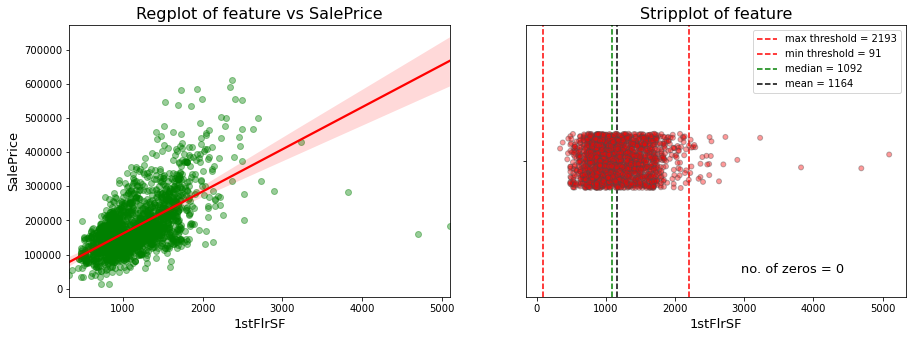

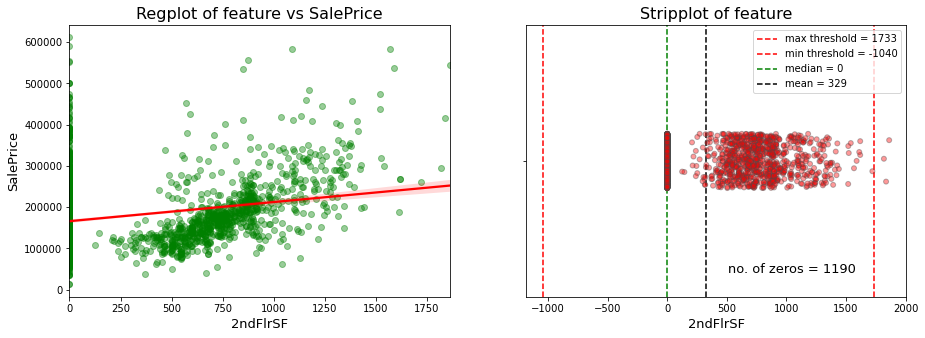

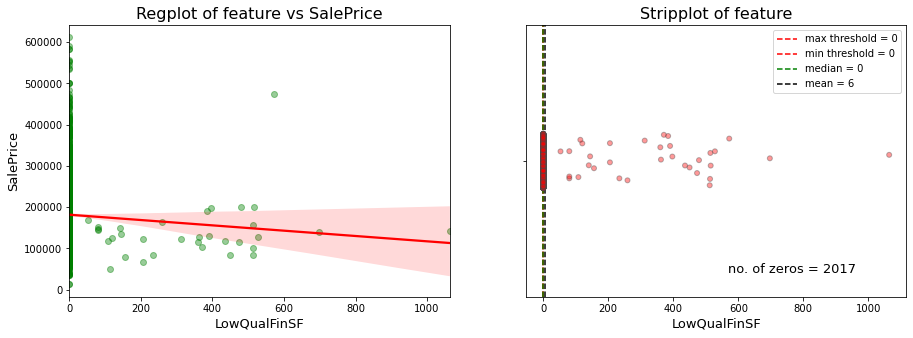

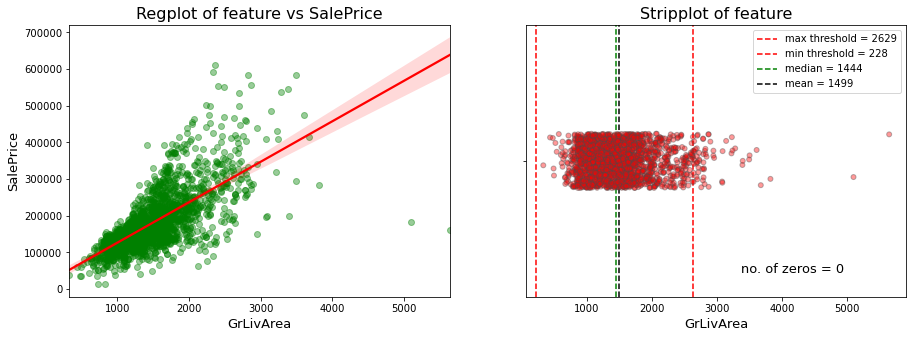

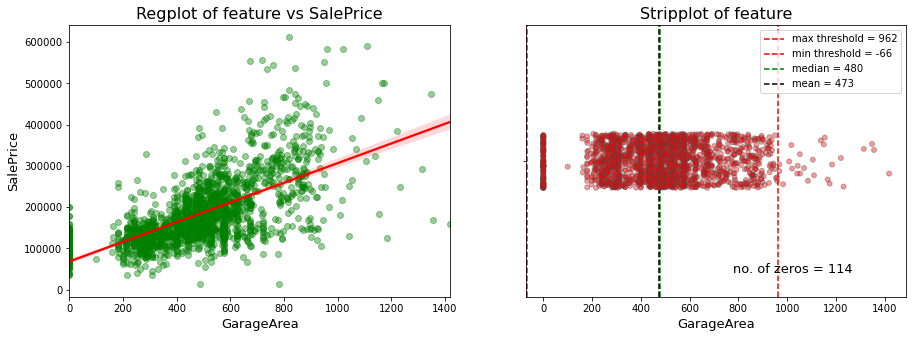

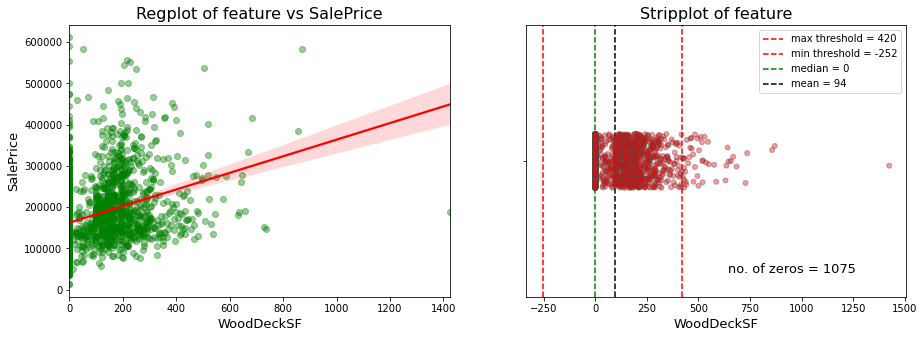

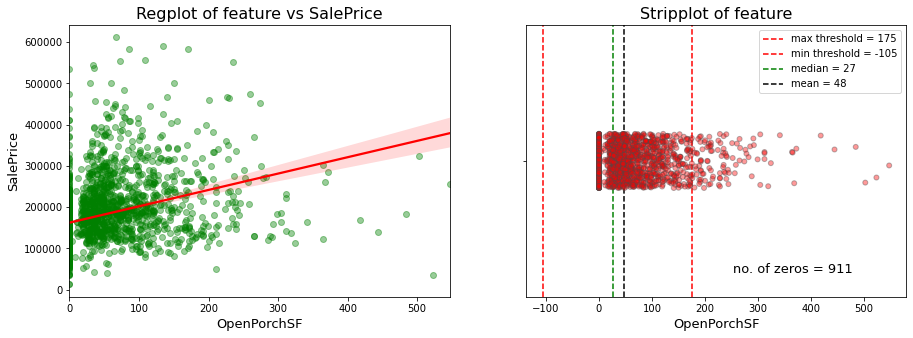

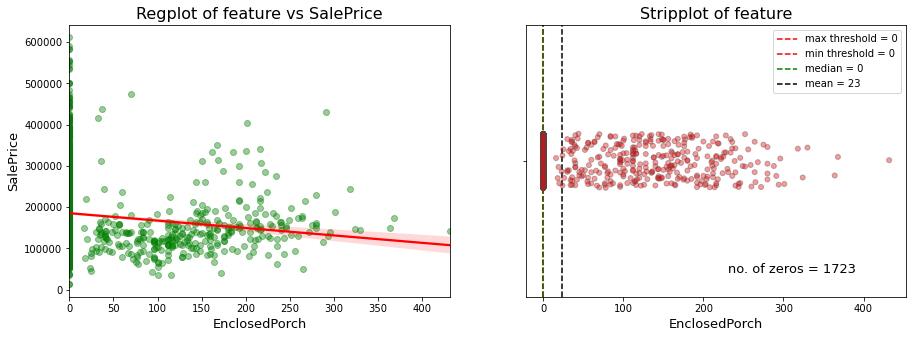

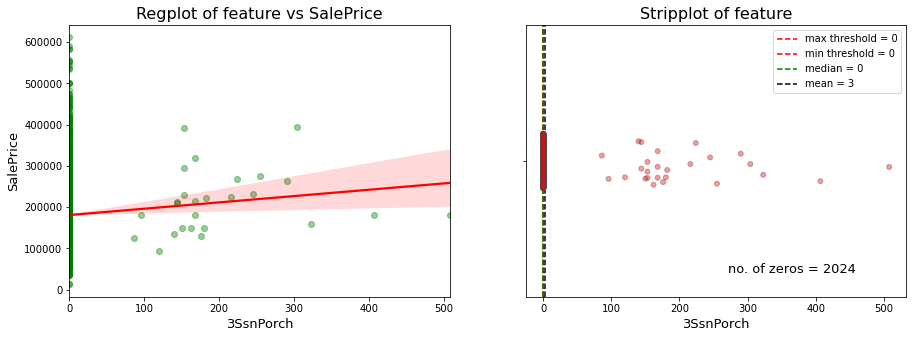

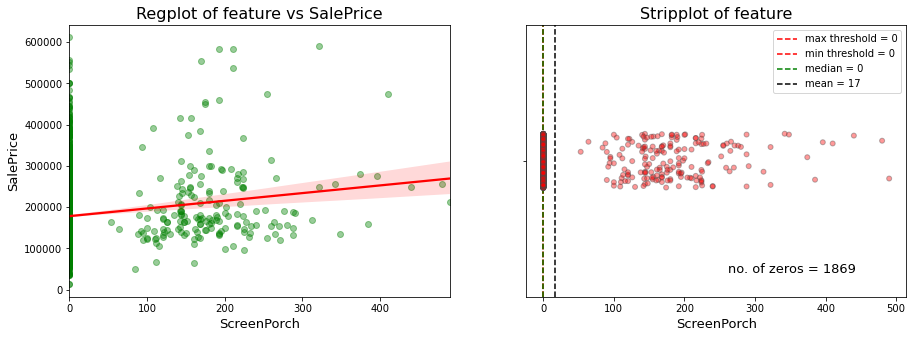

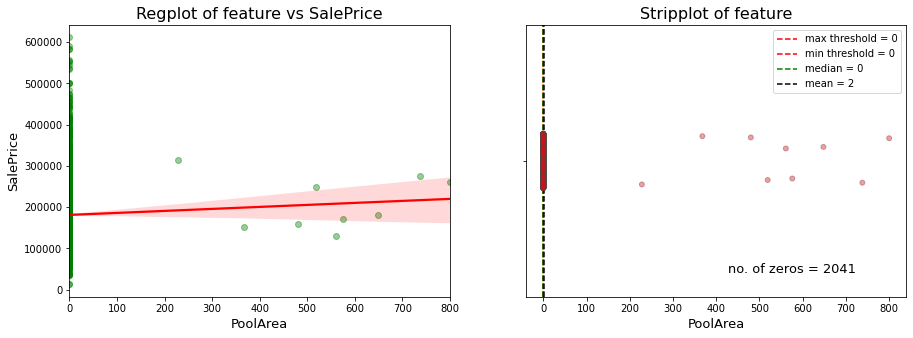

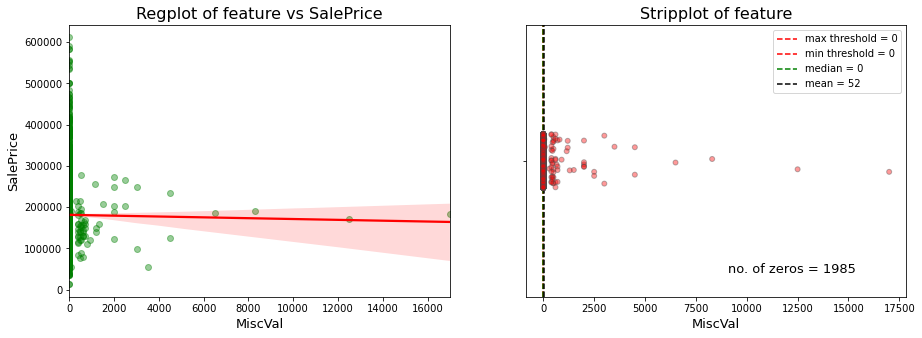

In [42]:
# plotting all numerical continuous features
scatter_list = num_continuous_feat_list[:-1] # exclude SalePrice column
print(len(scatter_list))
for c in scatter_list:
    num_con_plotter(c, "SalePrice", train_df)

**Observation**

There are 19 numerical continuous features (excluding `SalePrice`) and from analyzing the plots above, we observed two distinct points:

1. Some features had a linear relation with saleprice so we will select these. However, these features had a lot of outliers (as shown in the extent of the red shaded area in the regplot and number of data points above the max. threshold on the stripplot). We decided to set a threshold for each selected feature to identify the outliers, then drop the outliers. These included:

`LotFrontage` `LotArea` `BsmtFinSF1` `BsmtUnfSF` `TotalBsmtSF` `1stFlrSF` `GrLivArea` `GarageArea` `OpenPorchSF`

There are 3 border line features where the number of zeros is over or close to 50% of the population (i.e. 2050/2 = 1025). Upon consulting the data dictionary on their description, it seemed logical that these features may have zero values. For example, if there is no WoodDeck in the house, this value would be zero. Thus, we decided to leave these as zeros.

`MasVnrArea` `2ndFlrSF` `WoodDeckSF`

**12 shortlisted**


2. Some features had a large cluster (more than 50% of rows i.e. 2050/2=1025) of Zeros. If we impute these with the mean, it merely shifts the cluster to the mean. We can try to infer from their data dictionary description like we did before , but due to the excessive number of zeros, the median naturally become zero as well. Thus, we decided to drop these features from the selection. These included:

`BsmtFinSF2` `LowQualFinSF`  `EnclosedPorch` `3SsnPorch` `ScreenPorch` `PoolArea` `MiscVal`

**7 removed from selections**

Next is to treat the features as decided above.

### Applying decisions on treatment of numerical continuous features

Here we applied the treatment decision of imputing outliers and zeros with the mean for the selected features before checking on the next important consideration of collinearity.

In [43]:
# put the list of features and their outlier threshold
f_list = ["LotFrontage", "LotArea", "BsmtFinSF1", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "GrLivArea",
           "GarageArea", "OpenPorchSF"]
print(len(f_list), f_list)

9 ['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea', 'OpenPorchSF']


In [44]:
# define a function to handle the imputation
def threshold_zero_machine(dataframe, feature):
    # calculate threshold
    IQR = np.quantile(dataframe[feature], 0.75) - np.quantile(dataframe[feature], 0.25)
    max_threshold = np.quantile(dataframe[feature], 0.75) + 1.5*IQR
    print("calculated threshold", feature, round(max_threshold))
    
    # set outliers >= threshold to mean
    index_temp = dataframe.loc[dataframe[feature] >= max_threshold].index
    dataframe.drop(index_temp, axis=0, inplace=True)
    dataframe.reindex

In [45]:
# running on train_df
print(train_df.shape)
for f in f_list:
    threshold_zero_machine(train_df, f)

(2050, 75)
calculated threshold LotFrontage 105
calculated threshold LotArea 16811
calculated threshold BsmtFinSF1 1764
calculated threshold BsmtUnfSF 1668
calculated threshold TotalBsmtSF 1930
calculated threshold 1stFlrSF 1986
calculated threshold GrLivArea 2514
calculated threshold GarageArea 928
calculated threshold OpenPorchSF 157


In [46]:
train_df.shape

(1646, 75)

In [47]:
# update shortlist_num_feat_list with selected numerical continuous features
shortlist_num_feat_list = shortlist_num_feat_list + f_list
print(len(shortlist_num_feat_list))
print(shortlist_num_feat_list)

23
['YearBuilt', 'YearRemod/Add', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'SalePrice', 'LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea', 'OpenPorchSF']


### Collinearity of Numerical features

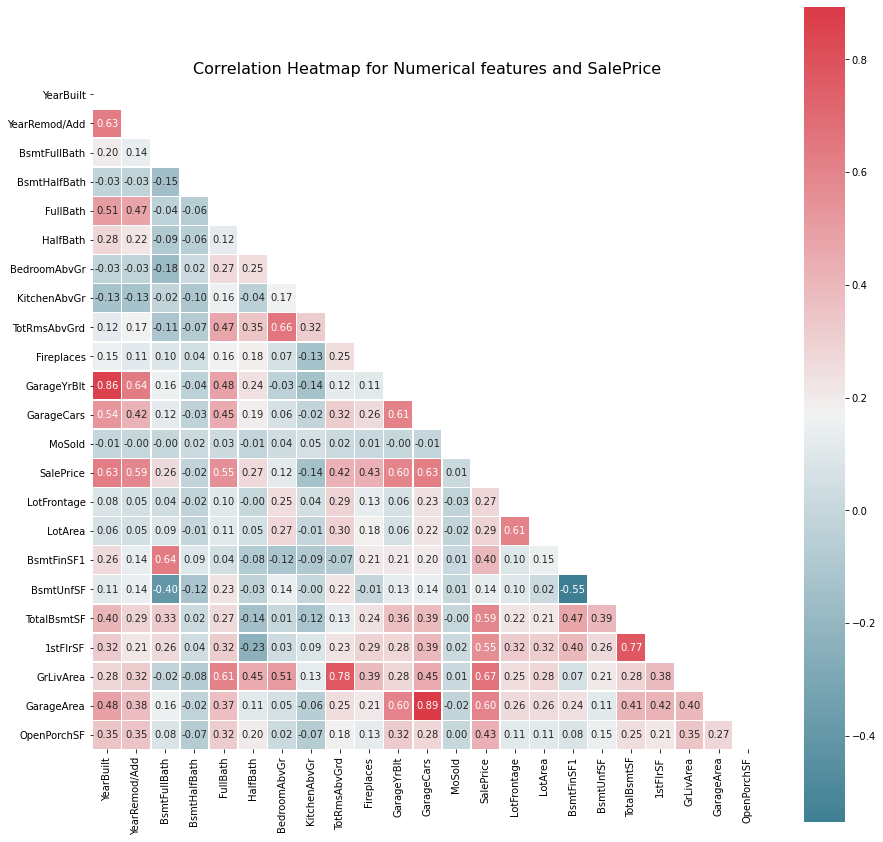

In [48]:
# plotting a heatmap to visualize correlations

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

fig, ax = plt.subplots(figsize=(15,15))
train_df_corr = train_df[shortlist_num_feat_list].corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(train_df_corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(train_df_corr, mask=mask, square=True, annot=True, cmap=cmap,
            fmt=".2f", linewidths=.5, annot_kws={'fontsize' : 10});
plt.title("Correlation Heatmap for Numerical features and SalePrice", fontsize=16)
plt.show()

Here we plotted the Pearson correlation heatmap and saw the correlation of numerical independent features with the output variable SalePrice. We will only select features which has correlation of above 0.5 (taking absolute value) with the output variable.

The correlation coefficient has values between -1 to 1
- A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
- A value closer to 1 implies stronger positive correlation
- A value closer to -1 implies stronger negative correlation

In [49]:
#Correlation with dependent variable
cor_target = abs(train_df_corr["SalePrice"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features.sort_values(ascending=False)

SalePrice        1.000000
GrLivArea        0.668579
YearBuilt        0.631692
GarageCars       0.626435
GarageArea       0.601429
GarageYrBlt      0.598366
YearRemod/Add    0.589632
TotalBsmtSF      0.588831
1stFlrSF         0.554601
FullBath         0.548719
Name: SalePrice, dtype: float64

From the sorted list, we could see that the top features with highest positive correlation coefficient (>0.5) were:

    GrLivArea        0.668579
    YearBuilt        0.631692
    GarageCars       0.626435
    GarageArea       0.601429
    GarageYrBlt      0.598366
    YearRemod/Add    0.589632
    TotalBsmtSF      0.588831
    1stFlrSF         0.554601
    FullBath         0.548719

**Total 10 numerical features shortlisted**. Let's put this into a temporary dataframe for heatmap plotting to visualize better.

In [52]:
# updating shortlist with improved selections
shortlist_num_feat_list = ["GrLivArea","YearBuilt", "GarageCars","GarageArea","GarageYrBlt",
                           "YearRemod/Add","TotalBsmtSF","1stFlrSF", "FullBath", "SalePrice"] # added salesprice
# create a temp df for plotting
shortlist_num_feat_temp_df = train_df[shortlist_num_feat_list]
shortlist_num_feat_temp_df

GrLivArea  YearBuilt  GarageCars  GarageArea  GarageYrBlt  \
0          1479       1976         2.0       475.0       1976.0   
1          2122       1996         2.0       559.0       1997.0   
2          1057       1953         1.0       246.0       1953.0   
3          1444       2006         2.0       400.0       2007.0   
4          1445       1900         2.0       484.0       1957.0   
...         ...        ...         ...         ...          ...   
2043       1232       1939         1.0       217.0       1939.0   
2044       1609       1995         2.0       525.0       1995.0   
2047        861       1940         2.0       539.0       1961.0   
2048       1913       1928         2.0       342.0       1929.0   
2050       1804       1999         2.0       442.0       1999.0   

      YearRemod/Add  TotalBsmtSF  1stFlrSF  FullBath  SalePrice  
0              2005        725.0       725         2     130500  
1              1997        913.0       913         2     220000  
2              2007       1057.0      1057         1     109000  
3              2007        384.0       744         2     174000  
4              1993        676.0       831         2     138500  
...             ...          ...       ...       ...        ...  
2043           1950        600.0       608         1     128000  
2044           1995        754.0       754         2     182000  
2047           1950        861.0       861         1      82500  
2048           1950        896.0      1172         1     177000  
2050           1999        994.0      1028         2     189000  

[1646 rows x 10 columns]

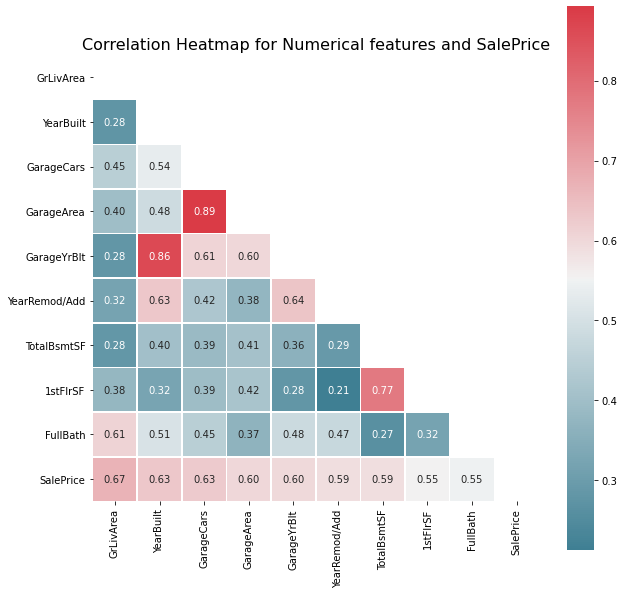

In [53]:
# plotting a heatmap to visualize correlations

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

fig, ax = plt.subplots(figsize=(10,10))
shortlist_num_feat_temp_df_corr = shortlist_num_feat_temp_df.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(shortlist_num_feat_temp_df_corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(shortlist_num_feat_temp_df_corr, mask=mask, square=True, annot=True, cmap=cmap,
            fmt=".2f", linewidths=.5, annot_kws={'fontsize' : 10});
plt.title("Correlation Heatmap for Numerical features and SalePrice", fontsize=16)
plt.show()

**Observation**

Now we can visualize better the correlation between variables, one of the assumptions of linear regression is that the independent features need to be uncorrelated with each other. If these features are highly correlated (>80%) with each other we should keep only one of them.

- `GarageYrBlt` vs `YearBuilt` - 0.86 (dropping `GarageYrBuilt` as it had lower correlation with `SalePrice`)
- `GarageArea` vs `GarageCars` - 0.85 (dropping `GarageCars` as it had lower correlation with `SalePrice`)

In [56]:
# re-aligning shortlist due to above additional drops
shortlist_num_feat_list = ["GrLivArea","YearBuilt", "GarageArea", "YearRemod/Add",
                           "TotalBsmtSF","1stFlrSF", "FullBath", "SalePrice"] # added salesprice

## Final features shortlist and clean dataframe

In [57]:
len(shortlist_cat_feat_list)

19

In [58]:
len(shortlist_num_feat_list)

8

In [59]:
# combining both categorical and numerical features shortlist into a final shortlist
final_shortlist_feat_list = shortlist_cat_feat_list + shortlist_num_feat_list
print("Final shortlist " + str(len(final_shortlist_feat_list)) + " features")
print(final_shortlist_feat_list)

Final shortlist 27 features
['MSSubClass', 'MSZoning', 'Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'GarageType', 'Foundation', 'LotShape', 'OverallQual', 'OverallCond', 'ExterQual', 'BsmtQual', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GrLivArea', 'YearBuilt', 'GarageArea', 'YearRemod/Add', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'SalePrice']


In [60]:
# create a final train dataframe
final_train_df = train_df[final_shortlist_feat_list]
print(final_train_df.shape)
final_train_df.head()

(1646, 27)


MSSubClass MSZoning Neighborhood HouseStyle Exterior1st Exterior2nd  \
0         60       RL       Sawyer     2Story     HdBoard     Plywood   
1         60       RL      SawyerW     2Story     VinylSd     VinylSd   
2         20       RL        NAmes     1Story     VinylSd     VinylSd   
3         60       RL       Timber     2Story     VinylSd     VinylSd   
4         50       RL      SawyerW     1.5Fin     Wd Sdng     Plywood   

  MasVnrType GarageType Foundation  LotShape  OverallQual  OverallCond  \
0    BrkFace     Attchd     CBlock         3            6            8   
1    BrkFace     Attchd      PConc         3            7            5   
2       None     Detchd     CBlock         4            5            7   
3       None    BuiltIn      PConc         4            5            5   
4       None     Detchd      PConc         3            6            8   

   ExterQual  BsmtQual  BsmtFinType1  HeatingQC  KitchenQual  FireplaceQu  \
0          4         4             7          5            4            1   
1          4         5             7          5            4            4   
2          3         4             7          3            4            1   
3          3         5             2          4            3            1   
4          3         3             2          3            3            1   

   GarageFinish  GrLivArea  YearBuilt  GarageArea  YearRemod/Add  TotalBsmtSF  \
0             3       1479       1976       475.0           2005        725.0   
1             3       2122       1996       559.0           1997        913.0   
2             2       1057       1953       246.0           2007       1057.0   
3             4       1444       2006       400.0           2007        384.0   
4             2       1445       1900       484.0           1993        676.0   

   1stFlrSF  FullBath  SalePrice  
0       725         2     130500  
1       913         2     220000  
2      1057         1     109000  
3       744         2     174000  
4       831         2     138500

# Export data to next step (final_train_df to a csv file)

In [61]:
final_train_df.to_csv('../datasets/final_train.csv', index=False)

**We will continue in the next code file so we don't have to keep waiting for re-run processing of plots everytime.**

Below are information that should be copied to the next file for code continuing.

In [62]:
print(cat_nominal_feat_list)

['MSSubClass', 'MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'GarageType', 'SaleType']


In [63]:
print(cat_ordinal_feat_list)

['LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive']


In [64]:
print(num_continuous_feat_list)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


In [65]:
print(num_discrete_feat_list)

['YearBuilt', 'YearRemod/Add', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold']


In [66]:
print(final_shortlist_feat_list)

['MSSubClass', 'MSZoning', 'Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'GarageType', 'Foundation', 'LotShape', 'OverallQual', 'OverallCond', 'ExterQual', 'BsmtQual', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GrLivArea', 'YearBuilt', 'GarageArea', 'YearRemod/Add', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'SalePrice']
